# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a training set and a test set of images of plant seedlings at various stages of grown. 
- Each image has a filename that is its unique id. 
- The dataset comprises 12 plant species.
- The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data
- The dataset has to be downloaded from the above Kagglewebsite.

### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Objective:
- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

## George's Challenge
What type of classification is this?

In [1]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/My Drive/Colab Notebooks/data/plant-seedlings-classification.zip"

In [4]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
#!mkdir temp_train
#!mkdir temp_train_new

# Unziping train file:

In [5]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [6]:
path = "./temp_train/train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    #print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    #print(img)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

## George's Challenge
Someone help me walk thru the code please :)

In [7]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


## George's Tip
Pathlib is the way to go for path operations in Python!
https://stackabuse.com/introduction-to-the-python-pathlib-module/

```
from glob import glob
top_xlsx_files = glob('*.xlsx')
all_xlsx_files = glob('**/*.xlsx', recursive=True)


from pathlib import Path
top_xlsx_files = Path.cwd().glob('*.xlsx')
all_xlsx_files = Path.cwd().rglob('*.xlsx')
```

## George's Challenge
- How to interpret the shape?
- Is this dataset balanced or not? How to find out?

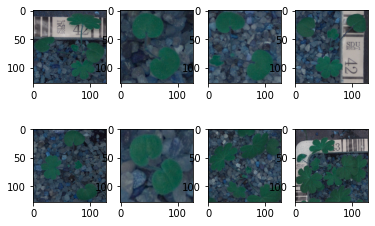

In [8]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

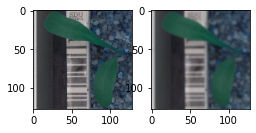

In [9]:
preprocessed_train = []       # Initialize empty list to store the images after pre-processing.

for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    preprocessed_train.append(blurImg)        # Append image 
    
# Show examples
plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_train = np.asarray(preprocessed_train)    # Convert to numpy array.

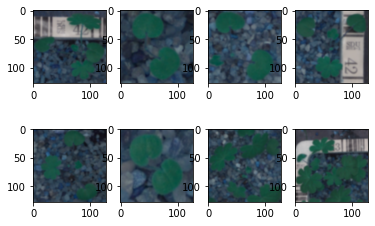

In [10]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_train[i])

In [11]:
# Normalize image data.
preprocessed_train = preprocessed_train / 255

# Make data compatible:

- Reshape data into shapes compatible with Keras models.
- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].

In [12]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(trainLabel)

In [13]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_train, y, test_size=0.3, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [16]:
# Reshape data into shapes compatible with Keras models.

#X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
#X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [17]:
#print(X_train.shape)
#print(X_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)


In [18]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

## George's Tip
There's no need to create the validation datasets separately since Keras can do it for you!
https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model#fit

In [19]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [20]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size, 128, 128, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [21]:
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## George's Tip
Which loss function to use?
- https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
- https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/ 
- https://stats.stackexchange.com/questions/260505/should-i-use-a-categorical-cross-entropy-or-binary-cross-entropy-loss-for-binary

In [22]:
X_train.shape, y_train.shape, X_val.shape, Y_val.shape

((3325, 128, 128, 3), (3325, 12), (713, 128, 128, 3), (713, 12))

In [30]:
# Set epochs = 30, and fit the model.
model.fit(X_train, y_train, epochs = 40, validation_data = (X_val,Y_val))

Epoch 1/40
104/104 [==============================] - 4s 42ms/step - loss: 2.3435 - accuracy: 0.1820 - val_loss: 2.1796 - val_accuracy: 0.3282
Epoch 2/40
104/104 [==============================] - 4s 36ms/step - loss: 2.0171 - accuracy: 0.2896 - val_loss: 1.9533 - val_accuracy: 0.3689
Epoch 3/40
104/104 [==============================] - 4s 36ms/step - loss: 1.8688 - accuracy: 0.3173 - val_loss: 1.9093 - val_accuracy: 0.3562
Epoch 4/40
104/104 [==============================] - 4s 36ms/step - loss: 1.8302 - accuracy: 0.3405 - val_loss: 1.8046 - val_accuracy: 0.3913
Epoch 5/40
104/104 [==============================] - 4s 34ms/step - loss: 1.7456 - accuracy: 0.3630 - val_loss: 1.7169 - val_accuracy: 0.4390
Epoch 6/40
104/104 [==============================] - 4s 34ms/step - loss: 1.6333 - accuracy: 0.4144 - val_loss: 1.6655 - val_accuracy: 0.4572
Epoch 7/40
104/104 [==============================] - 4s 34ms/step - loss: 1.5378 - accuracy: 0.4644 - val_loss: 1.5392 - val_accuracy: 0.5302

## George's Challenge
- How do we choose number of epochs? Batch size?
- How to better evaluate model performance? Hint, what's a very useful tool?

Epoch 1/40
84/84 [==============================] - 4s 45ms/step - loss: 2.4394 - accuracy: 0.1380 - val_loss: 2.4481 - val_accuracy: 0.1624
Epoch 2/40
84/84 [==============================] - 3s 38ms/step - loss: 2.4253 - accuracy: 0.1380 - val_loss: 2.4217 - val_accuracy: 0.1293
Epoch 3/40
84/84 [==============================] - 3s 38ms/step - loss: 2.4248 - accuracy: 0.1320 - val_loss: 2.4187 - val_accuracy: 0.1293
Epoch 4/40
84/84 [==============================] - 3s 38ms/step - loss: 2.4271 - accuracy: 0.1305 - val_loss: 2.4222 - val_accuracy: 0.1293
Epoch 5/40
84/84 [==============================] - 3s 39ms/step - loss: 2.3456 - accuracy: 0.1925 - val_loss: 2.1563 - val_accuracy: 0.3459
Epoch 6/40
84/84 [==============================] - 3s 38ms/step - loss: 1.9707 - accuracy: 0.2906 - val_loss: 1.9041 - val_accuracy: 0.3880
Epoch 7/40
84/84 [==============================] - 3s 38ms/step - loss: 1.8594 - accuracy: 0.3165 - val_loss: 1.9609 - val_accuracy: 0.2857
Epoch 8/40
84

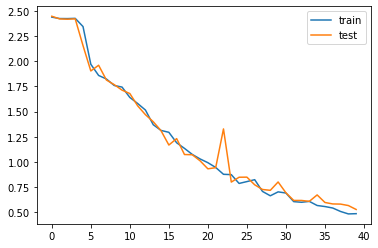

In [23]:
#@title Solution

from matplotlib import pyplot

history = model.fit(X_train, y_train, epochs = 40, validation_split=0.2)

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [24]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.506023108959198
Test accuracy: 0.8567415475845337


## George's Tip
- Why does the loss fluctuate? Dataset size, batch size...
- https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm

## George's Tip
- Batch size, what and how?  
- https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network   
- https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm    
- https://stackoverflow.com/questions/35050753/how-big-should-batch-size-and-number-of-epochs-be-when-fitting-a-model-in-keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


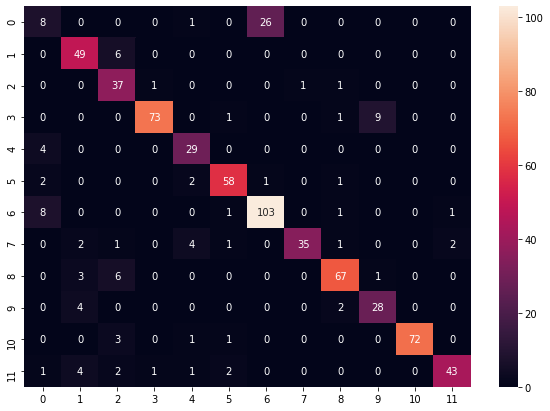

In [33]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

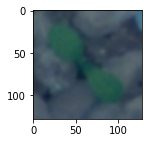

Predicted Label 9
True Label 9


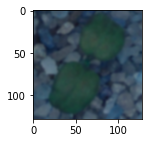

Predicted Label 2
True Label 2


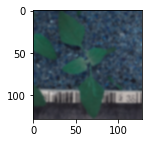

Predicted Label 5
True Label 5


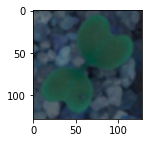

Predicted Label 1
True Label 1


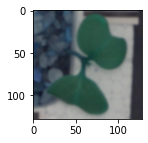

Predicted Label 1
True Label 1


In [34]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

## George's Bonus $$$
__Keras Tuner__
- https://github.com/keras-team/keras-tuner
- https://keras-team.github.io/keras-tuner/
- Introduction to the Keras Tuner  https://www.tensorflow.org/tutorials/keras/keras_tuner 
- Hyperparameter Tuning with Keras Tuner  https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe 
- Hands on Hyperparameter Tuning with Keras Tuner  https://www.kdnuggets.com/2020/02/hyperparameter-tuning-keras-tuner.html 
- Hyperparameter tuning with Keras Tuner  https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html 

Epoch 1/50
84/84 [==============================] - 3s 41ms/step - loss: 2.4248 - accuracy: 0.1447 - val_loss: 2.2633 - val_accuracy: 0.2857
Epoch 2/50
84/84 [==============================] - 3s 38ms/step - loss: 2.1086 - accuracy: 0.2654 - val_loss: 2.0327 - val_accuracy: 0.3278
Epoch 3/50
84/84 [==============================] - 3s 38ms/step - loss: 1.9441 - accuracy: 0.3019 - val_loss: 1.9070 - val_accuracy: 0.3489
Epoch 4/50
84/84 [==============================] - 3s 38ms/step - loss: 1.8928 - accuracy: 0.3147 - val_loss: 1.9664 - val_accuracy: 0.3474
Epoch 5/50
84/84 [==============================] - 3s 38ms/step - loss: 1.8240 - accuracy: 0.3297 - val_loss: 1.8167 - val_accuracy: 0.4015
Epoch 6/50
84/84 [==============================] - 3s 38ms/step - loss: 1.7644 - accuracy: 0.3816 - val_loss: 1.9472 - val_accuracy: 0.3293
Epoch 7/50
84/84 [==============================] - 3s 38ms/step - loss: 1.7446 - accuracy: 0.3767 - val_loss: 1.7541 - val_accuracy: 0.4647
Epoch 8/50
84

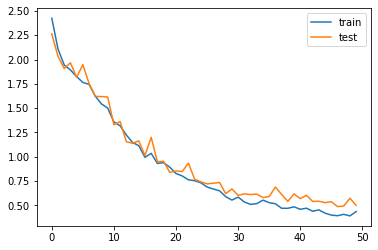

In [26]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size, 128, 128, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45362764596939087
Test accuracy: 0.8497191071510315


In [25]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=43a6f2ca42dd11a95f713e6b3bc69b7cf67754d804e2b19eafe180fa231bfd70
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=cfc913cbde1222fe7a42be15ec7d3ef00186d16b17c0fd845c01306bcbf1aa74
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [28]:
import tensorflow as tf
import kerastuner as kt
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch, Hyperband


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_1',
                    values=[16, 32, 64],
                    default=32,
                ),
                kernel_size=3,
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_2',
                    values=[16, 32, 64],
                    default=32,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPool2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )

        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_3',
                    values=[16, 32, 64],
                    default=64,
                ),
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_4',
                    values=[16, 32, 64],
                    default=64,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPool2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.3,
                step=0.05,
            ))
        )

        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_5',
                    values=[32, 64, 128],
                    default=128,
                ),
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters_6',
                    values=[32, 64, 128],
                    default=128,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPool2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_3',
                min_value=0.0,
                max_value=0.5,
                default=0.4,
                step=0.05,
            ))
        )
        
        model.add(GlobalMaxPooling2D())
        model.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=256
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_4',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.5,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            #loss='sparse_categorical_crossentropy',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

In [31]:
INPUT_SHAPE = (128, 128, 3)
NUM_CLASSES = 12
hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
SEED = 66

MAX_TRIALS = 10
EXECUTION_PER_TRIAL = 2

tuner = RandomSearch(
    hypermodel=hypermodel,
    objective='val_accuracy',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search'
)

tuner.search_space_summary()

In [32]:
N_EPOCH_SEARCH = 50
tuner.search(X_train, y_train, epochs=N_EPOCH_SEARCH, validation_split=0.1)

Epoch 1/50
94/94 [==============================] - 2s 25ms/step - loss: 2.4325 - accuracy: 0.1210 - val_loss: 2.3896 - val_accuracy: 0.1351
Epoch 2/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4250 - accuracy: 0.1263 - val_loss: 2.4033 - val_accuracy: 0.1351
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4251 - accuracy: 0.1390 - val_loss: 2.4078 - val_accuracy: 0.1351
Epoch 4/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4246 - accuracy: 0.1390 - val_loss: 2.4034 - val_accuracy: 0.1532
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 2.4261 - accuracy: 0.1203 - val_loss: 2.3924 - val_accuracy: 0.1351
Epoch 6/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4247 - accuracy: 0.1197 - val_loss: 2.3949 - val_accuracy: 0.1201
Epoch 7/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4234 - accuracy: 0.1290 - val_loss: 2.4006 - val_accuracy: 0.1532
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 2s 25ms/step - loss: 2.4656 - accuracy: 0.1150 - val_loss: 2.4121 - val_accuracy: 0.1351
Epoch 2/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4152 - accuracy: 0.1481 - val_loss: 2.3911 - val_accuracy: 0.1742
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 2.2737 - accuracy: 0.2360 - val_loss: 2.0569 - val_accuracy: 0.3273
Epoch 4/50
94/94 [==============================] - 2s 22ms/step - loss: 1.9755 - accuracy: 0.3028 - val_loss: 1.8721 - val_accuracy: 0.3724
Epoch 5/50
94/94 [==============================] - 2s 22ms/step - loss: 1.8658 - accuracy: 0.3145 - val_loss: 1.8494 - val_accuracy: 0.3724
Epoch 6/50
94/94 [==============================] - 2s 22ms/step - loss: 1.8262 - accuracy: 0.3342 - val_loss: 1.7869 - val_accuracy: 0.3874
Epoch 7/50
94/94 [==============================] - 2s 22ms/step - loss: 1.8011 - accuracy: 0.3299 - val_loss: 1.8026 - val_accuracy: 0.3694
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 3s 32ms/step - loss: 2.4396 - accuracy: 0.1220 - val_loss: 2.3983 - val_accuracy: 0.1351
Epoch 2/50
94/94 [==============================] - 3s 28ms/step - loss: 2.4244 - accuracy: 0.1370 - val_loss: 2.3981 - val_accuracy: 0.1532
Epoch 3/50
94/94 [==============================] - 3s 29ms/step - loss: 2.4249 - accuracy: 0.1213 - val_loss: 2.3921 - val_accuracy: 0.1532
Epoch 4/50
94/94 [==============================] - 3s 28ms/step - loss: 2.4217 - accuracy: 0.1340 - val_loss: 2.3901 - val_accuracy: 0.1351
Epoch 5/50
94/94 [==============================] - 3s 28ms/step - loss: 2.4234 - accuracy: 0.1320 - val_loss: 2.3963 - val_accuracy: 0.1351
Epoch 6/50
94/94 [==============================] - 3s 29ms/step - loss: 2.4230 - accuracy: 0.1340 - val_loss: 2.3897 - val_accuracy: 0.1351
Epoch 7/50
94/94 [==============================] - 3s 28ms/step - loss: 2.4218 - accuracy: 0.1303 - val_loss: 2.3927 - val_accuracy: 0.1351
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 4s 41ms/step - loss: 2.4375 - accuracy: 0.1270 - val_loss: 2.4259 - val_accuracy: 0.1802
Epoch 2/50
94/94 [==============================] - 3s 37ms/step - loss: 2.3307 - accuracy: 0.2019 - val_loss: 2.0808 - val_accuracy: 0.3093
Epoch 3/50
94/94 [==============================] - 3s 37ms/step - loss: 2.0328 - accuracy: 0.2918 - val_loss: 1.8714 - val_accuracy: 0.4024
Epoch 4/50
94/94 [==============================] - 3s 37ms/step - loss: 1.9469 - accuracy: 0.3018 - val_loss: 1.8612 - val_accuracy: 0.3724
Epoch 5/50
94/94 [==============================] - 3s 37ms/step - loss: 1.8471 - accuracy: 0.3326 - val_loss: 1.7996 - val_accuracy: 0.3874
Epoch 6/50
94/94 [==============================] - 3s 37ms/step - loss: 1.7961 - accuracy: 0.3489 - val_loss: 1.7415 - val_accuracy: 0.3874
Epoch 7/50
94/94 [==============================] - 3s 37ms/step - loss: 1.7701 - accuracy: 0.3516 - val_loss: 1.7181 - val_accuracy: 0.4294
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 3s 35ms/step - loss: 2.4518 - accuracy: 0.1257 - val_loss: 2.4007 - val_accuracy: 0.2823
Epoch 2/50
94/94 [==============================] - 3s 32ms/step - loss: 2.2127 - accuracy: 0.2430 - val_loss: 2.0650 - val_accuracy: 0.3694
Epoch 3/50
94/94 [==============================] - 3s 31ms/step - loss: 1.9618 - accuracy: 0.3008 - val_loss: 1.9354 - val_accuracy: 0.3574
Epoch 4/50
94/94 [==============================] - 3s 32ms/step - loss: 1.8272 - accuracy: 0.3389 - val_loss: 1.8063 - val_accuracy: 0.3964
Epoch 5/50
94/94 [==============================] - 3s 31ms/step - loss: 1.7457 - accuracy: 0.3626 - val_loss: 1.6883 - val_accuracy: 0.4354
Epoch 6/50
94/94 [==============================] - 3s 31ms/step - loss: 1.7025 - accuracy: 0.3994 - val_loss: 1.7227 - val_accuracy: 0.4054
Epoch 7/50
94/94 [==============================] - 3s 31ms/step - loss: 1.6199 - accuracy: 0.4201 - val_loss: 1.5864 - val_accuracy: 0.4805
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 3s 30ms/step - loss: 2.6327 - accuracy: 0.1046 - val_loss: 2.5709 - val_accuracy: 0.1051
Epoch 2/50
94/94 [==============================] - 3s 27ms/step - loss: 2.4552 - accuracy: 0.1143 - val_loss: 2.4049 - val_accuracy: 0.1351
Epoch 3/50
94/94 [==============================] - 3s 27ms/step - loss: 2.4348 - accuracy: 0.1320 - val_loss: 2.3948 - val_accuracy: 0.1351
Epoch 4/50
94/94 [==============================] - 3s 27ms/step - loss: 2.4278 - accuracy: 0.1260 - val_loss: 2.3883 - val_accuracy: 0.1351
Epoch 5/50
94/94 [==============================] - 2s 26ms/step - loss: 2.4249 - accuracy: 0.1247 - val_loss: 2.3902 - val_accuracy: 0.1351
Epoch 6/50
94/94 [==============================] - 2s 26ms/step - loss: 2.4308 - accuracy: 0.1243 - val_loss: 2.3911 - val_accuracy: 0.1532
Epoch 7/50
94/94 [==============================] - 3s 27ms/step - loss: 2.4274 - accuracy: 0.1253 - val_loss: 2.3869 - val_accuracy: 0.1532
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 3s 31ms/step - loss: 2.4370 - accuracy: 0.1320 - val_loss: 2.4165 - val_accuracy: 0.2793
Epoch 2/50
94/94 [==============================] - 3s 29ms/step - loss: 2.1137 - accuracy: 0.2657 - val_loss: 2.0295 - val_accuracy: 0.3393
Epoch 3/50
94/94 [==============================] - 3s 29ms/step - loss: 1.8733 - accuracy: 0.3058 - val_loss: 1.9553 - val_accuracy: 0.3303
Epoch 4/50
94/94 [==============================] - 3s 29ms/step - loss: 1.7495 - accuracy: 0.3576 - val_loss: 1.8406 - val_accuracy: 0.4084
Epoch 5/50
94/94 [==============================] - 3s 29ms/step - loss: 1.6739 - accuracy: 0.3854 - val_loss: 1.7245 - val_accuracy: 0.4715
Epoch 6/50
94/94 [==============================] - 3s 29ms/step - loss: 1.4874 - accuracy: 0.4672 - val_loss: 1.5642 - val_accuracy: 0.5345
Epoch 7/50
94/94 [==============================] - 3s 29ms/step - loss: 1.2736 - accuracy: 0.5451 - val_loss: 1.3526 - val_accuracy: 0.6096
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 4s 42ms/step - loss: 2.4528 - accuracy: 0.1303 - val_loss: 2.4208 - val_accuracy: 0.1351
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 2.4413 - accuracy: 0.1297 - val_loss: 2.4091 - val_accuracy: 0.1351
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 2.4277 - accuracy: 0.1344 - val_loss: 2.4212 - val_accuracy: 0.1351
Epoch 4/50
94/94 [==============================] - 4s 39ms/step - loss: 2.3561 - accuracy: 0.2002 - val_loss: 2.0799 - val_accuracy: 0.2793
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 2.1087 - accuracy: 0.2828 - val_loss: 1.9017 - val_accuracy: 0.3453
Epoch 6/50
94/94 [==============================] - 4s 39ms/step - loss: 1.9662 - accuracy: 0.2941 - val_loss: 1.8021 - val_accuracy: 0.3874
Epoch 7/50
94/94 [==============================] - 4s 39ms/step - loss: 1.8708 - accuracy: 0.3168 - val_loss: 1.7695 - val_accuracy: 0.3904
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 3s 35ms/step - loss: 2.4146 - accuracy: 0.1444 - val_loss: 2.2886 - val_accuracy: 0.2763
Epoch 2/50
94/94 [==============================] - 3s 32ms/step - loss: 2.0266 - accuracy: 0.2838 - val_loss: 2.0529 - val_accuracy: 0.2853
Epoch 3/50
94/94 [==============================] - 3s 32ms/step - loss: 1.8432 - accuracy: 0.3138 - val_loss: 1.9115 - val_accuracy: 0.3724
Epoch 4/50
94/94 [==============================] - 3s 31ms/step - loss: 1.7730 - accuracy: 0.3366 - val_loss: 1.8410 - val_accuracy: 0.3724
Epoch 5/50
94/94 [==============================] - 3s 32ms/step - loss: 1.7247 - accuracy: 0.3653 - val_loss: 1.8245 - val_accuracy: 0.3634
Epoch 6/50
94/94 [==============================] - 3s 32ms/step - loss: 1.6492 - accuracy: 0.3971 - val_loss: 1.7388 - val_accuracy: 0.4655
Epoch 7/50
94/94 [==============================] - 3s 31ms/step - loss: 1.6101 - accuracy: 0.4218 - val_loss: 1.6114 - val_accuracy: 0.4895
Epoch 8/50
94

Epoch 1/50
94/94 [==============================] - 2s 25ms/step - loss: 2.5603 - accuracy: 0.1153 - val_loss: 2.4039 - val_accuracy: 0.1051
Epoch 2/50
94/94 [==============================] - 2s 23ms/step - loss: 2.4992 - accuracy: 0.1150 - val_loss: 2.3988 - val_accuracy: 0.1562
Epoch 3/50
94/94 [==============================] - 2s 23ms/step - loss: 2.4466 - accuracy: 0.1303 - val_loss: 2.4130 - val_accuracy: 0.1471
Epoch 4/50
94/94 [==============================] - 2s 23ms/step - loss: 2.4212 - accuracy: 0.1364 - val_loss: 2.4108 - val_accuracy: 0.1381
Epoch 5/50
94/94 [==============================] - 2s 23ms/step - loss: 2.4123 - accuracy: 0.1347 - val_loss: 2.3866 - val_accuracy: 0.1712
Epoch 6/50
94/94 [==============================] - 2s 23ms/step - loss: 2.4090 - accuracy: 0.1387 - val_loss: 2.4196 - val_accuracy: 0.1532
Epoch 7/50
94/94 [==============================] - 2s 22ms/step - loss: 2.4173 - accuracy: 0.1327 - val_loss: 2.3995 - val_accuracy: 0.1111
Epoch 8/50
94

INFO:tensorflow:Oracle triggered exit


In [33]:
# Show a summary of the search
tuner.results_summary()

In [36]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model.
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36982280015945435
Test accuracy: 0.882022500038147


In [38]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=60,
            objective='val_accuracy',
            seed=SEED,
            executions_per_trial=2
        )

tuner_hb.search(X_train, y_train, validation_split=0.1)
best_model = tuner_hb.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4411 - accuracy: 0.1334 - val_loss: 2.3986 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4261 - accuracy: 0.1350 - val_loss: 2.3944 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4239 - accuracy: 0.1293 - val_loss: 2.3926 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4567 - accuracy: 0.1314 - val_loss: 2.3964 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4262 - accuracy: 0.1290 - val_loss: 2.3863 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4256 - accuracy: 0.1290 - val_loss: 2.3913 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 4s 39ms/step - loss: 2.4438 - accuracy: 0.1160 - val_loss: 2.4278 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4275 - accuracy: 0.1350 - val_loss: 2.4220 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 36ms/step - loss: 2.3841 - accuracy: 0.1741 - val_loss: 2.1578 - val_accuracy: 0.2793
Epoch 1/3
94/94 [==============================] - 4s 38ms/step - loss: 2.4436 - accuracy: 0.1237 - val_loss: 2.4243 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 37ms/step - loss: 2.4220 - accuracy: 0.1327 - val_loss: 2.3688 - val_accuracy: 0.1652
Epoch 3/3
94/94 [==============================] - 3s 37ms/step - loss: 2.2267 - accuracy: 0.2450 - val_loss: 2.0188 - val_accuracy: 0.3153


Epoch 1/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4398 - accuracy: 0.1233 - val_loss: 2.3594 - val_accuracy: 0.2462
Epoch 2/3
94/94 [==============================] - 3s 32ms/step - loss: 2.2359 - accuracy: 0.2400 - val_loss: 2.0202 - val_accuracy: 0.3243
Epoch 3/3
94/94 [==============================] - 3s 32ms/step - loss: 1.9870 - accuracy: 0.2941 - val_loss: 1.9129 - val_accuracy: 0.3754
Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4492 - accuracy: 0.1263 - val_loss: 2.4303 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4275 - accuracy: 0.1237 - val_loss: 2.4183 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4264 - accuracy: 0.1370 - val_loss: 2.4076 - val_accuracy: 0.1532


Epoch 1/3
94/94 [==============================] - 3s 29ms/step - loss: 2.6557 - accuracy: 0.1066 - val_loss: 2.5896 - val_accuracy: 0.1201
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 2.6199 - accuracy: 0.1083 - val_loss: 2.5310 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 2.6021 - accuracy: 0.1036 - val_loss: 2.4268 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 3s 28ms/step - loss: 2.6985 - accuracy: 0.1110 - val_loss: 2.6095 - val_accuracy: 0.1201
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 2.5637 - accuracy: 0.1166 - val_loss: 2.3943 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 2.4275 - accuracy: 0.1263 - val_loss: 2.3990 - val_accuracy: 0.1532


Epoch 1/3
94/94 [==============================] - 3s 31ms/step - loss: 2.3980 - accuracy: 0.1695 - val_loss: 2.2656 - val_accuracy: 0.2733
Epoch 2/3
94/94 [==============================] - 3s 29ms/step - loss: 2.0567 - accuracy: 0.2898 - val_loss: 2.0141 - val_accuracy: 0.3544
Epoch 3/3
94/94 [==============================] - 3s 29ms/step - loss: 1.8635 - accuracy: 0.3105 - val_loss: 1.9170 - val_accuracy: 0.3724
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4355 - accuracy: 0.1260 - val_loss: 2.4310 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 29ms/step - loss: 2.2443 - accuracy: 0.2219 - val_loss: 2.1248 - val_accuracy: 0.3003
Epoch 3/3
94/94 [==============================] - 3s 29ms/step - loss: 1.9478 - accuracy: 0.2948 - val_loss: 1.9021 - val_accuracy: 0.3544


Epoch 1/3
94/94 [==============================] - 4s 41ms/step - loss: 2.4479 - accuracy: 0.1257 - val_loss: 2.3859 - val_accuracy: 0.2823
Epoch 2/3
94/94 [==============================] - 4s 39ms/step - loss: 2.2518 - accuracy: 0.2470 - val_loss: 2.0463 - val_accuracy: 0.3093
Epoch 3/3
94/94 [==============================] - 4s 39ms/step - loss: 2.0273 - accuracy: 0.2918 - val_loss: 1.8856 - val_accuracy: 0.3303
Epoch 1/3
94/94 [==============================] - 4s 41ms/step - loss: 2.4471 - accuracy: 0.1166 - val_loss: 2.4213 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 4s 39ms/step - loss: 2.4121 - accuracy: 0.1367 - val_loss: 2.2237 - val_accuracy: 0.2733
Epoch 3/3
94/94 [==============================] - 4s 39ms/step - loss: 2.1758 - accuracy: 0.2597 - val_loss: 1.9892 - val_accuracy: 0.3243


Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4319 - accuracy: 0.1217 - val_loss: 2.4329 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.3081 - accuracy: 0.1992 - val_loss: 2.1209 - val_accuracy: 0.3183
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 1.9782 - accuracy: 0.2848 - val_loss: 2.0033 - val_accuracy: 0.3003
Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4332 - accuracy: 0.1307 - val_loss: 2.4282 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.2798 - accuracy: 0.2049 - val_loss: 2.1439 - val_accuracy: 0.2462
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 1.9096 - accuracy: 0.3015 - val_loss: 1.9454 - val_accuracy: 0.3544


Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.5510 - accuracy: 0.1140 - val_loss: 2.3961 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4849 - accuracy: 0.1176 - val_loss: 2.3891 - val_accuracy: 0.1652
Epoch 3/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4432 - accuracy: 0.1180 - val_loss: 2.4067 - val_accuracy: 0.1141
Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.5660 - accuracy: 0.1156 - val_loss: 2.3863 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4921 - accuracy: 0.1250 - val_loss: 2.4104 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4356 - accuracy: 0.1173 - val_loss: 2.3755 - val_accuracy: 0.1922


Epoch 1/3
94/94 [==============================] - 4s 39ms/step - loss: 2.4489 - accuracy: 0.1233 - val_loss: 2.4252 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 4s 38ms/step - loss: 2.3233 - accuracy: 0.1975 - val_loss: 2.0671 - val_accuracy: 0.3093
Epoch 3/3
94/94 [==============================] - 3s 37ms/step - loss: 2.0301 - accuracy: 0.2838 - val_loss: 2.0020 - val_accuracy: 0.2883
Epoch 1/3
94/94 [==============================] - 4s 39ms/step - loss: 2.4443 - accuracy: 0.1303 - val_loss: 2.4386 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 4s 37ms/step - loss: 2.4303 - accuracy: 0.1247 - val_loss: 2.4149 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 37ms/step - loss: 2.4049 - accuracy: 0.1588 - val_loss: 2.2132 - val_accuracy: 0.2763


Epoch 1/3
94/94 [==============================] - 3s 32ms/step - loss: 2.5766 - accuracy: 0.1026 - val_loss: 2.4067 - val_accuracy: 0.1922
Epoch 2/3
94/94 [==============================] - 3s 30ms/step - loss: 2.5166 - accuracy: 0.1116 - val_loss: 2.3925 - val_accuracy: 0.2072
Epoch 3/3
94/94 [==============================] - 3s 30ms/step - loss: 2.5062 - accuracy: 0.1220 - val_loss: 2.3845 - val_accuracy: 0.1892
Epoch 1/3
94/94 [==============================] - 3s 32ms/step - loss: 2.6156 - accuracy: 0.1080 - val_loss: 2.4696 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 30ms/step - loss: 2.5114 - accuracy: 0.1100 - val_loss: 2.4587 - val_accuracy: 0.1381
Epoch 3/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4702 - accuracy: 0.1364 - val_loss: 2.4100 - val_accuracy: 0.0871


Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.3014 - accuracy: 0.1845 - val_loss: 2.0010 - val_accuracy: 0.3243
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 1.9022 - accuracy: 0.3135 - val_loss: 1.8517 - val_accuracy: 0.3574
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 1.8174 - accuracy: 0.3205 - val_loss: 1.8017 - val_accuracy: 0.3844
Epoch 1/3
94/94 [==============================] - 3s 29ms/step - loss: 2.3644 - accuracy: 0.1735 - val_loss: 2.1170 - val_accuracy: 0.3213
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 1.9202 - accuracy: 0.3031 - val_loss: 1.8812 - val_accuracy: 0.3694
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 1.8525 - accuracy: 0.3215 - val_loss: 1.8825 - val_accuracy: 0.3814


Epoch 1/3
94/94 [==============================] - 3s 35ms/step - loss: 2.4357 - accuracy: 0.1314 - val_loss: 2.4375 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4071 - accuracy: 0.1588 - val_loss: 2.3558 - val_accuracy: 0.2402
Epoch 3/3
94/94 [==============================] - 3s 33ms/step - loss: 2.0551 - accuracy: 0.2691 - val_loss: 1.9843 - val_accuracy: 0.3333
Epoch 1/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4406 - accuracy: 0.1280 - val_loss: 2.4368 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 3s 32ms/step - loss: 2.3410 - accuracy: 0.1818 - val_loss: 2.1804 - val_accuracy: 0.3063
Epoch 3/3
94/94 [==============================] - 3s 33ms/step - loss: 1.9687 - accuracy: 0.2931 - val_loss: 2.0090 - val_accuracy: 0.3934


Epoch 1/3
94/94 [==============================] - 3s 29ms/step - loss: 2.4360 - accuracy: 0.1297 - val_loss: 2.4054 - val_accuracy: 0.1201
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4152 - accuracy: 0.1324 - val_loss: 2.3888 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 2.4090 - accuracy: 0.1390 - val_loss: 2.3868 - val_accuracy: 0.2012
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4971 - accuracy: 0.1434 - val_loss: 2.3257 - val_accuracy: 0.2402
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.1090 - accuracy: 0.2821 - val_loss: 1.9542 - val_accuracy: 0.3604
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 1.9035 - accuracy: 0.3279 - val_loss: 1.8077 - val_accuracy: 0.3664


Epoch 1/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4380 - accuracy: 0.1283 - val_loss: 2.4249 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 3s 29ms/step - loss: 2.3133 - accuracy: 0.1858 - val_loss: 2.1029 - val_accuracy: 0.3063
Epoch 3/3
94/94 [==============================] - 3s 29ms/step - loss: 2.0105 - accuracy: 0.2938 - val_loss: 1.9014 - val_accuracy: 0.3694
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4399 - accuracy: 0.1200 - val_loss: 2.4464 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.3693 - accuracy: 0.1691 - val_loss: 2.1588 - val_accuracy: 0.2853
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 2.0509 - accuracy: 0.2797 - val_loss: 1.9444 - val_accuracy: 0.3393


Epoch 1/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4341 - accuracy: 0.1293 - val_loss: 2.3993 - val_accuracy: 0.1201
Epoch 2/3
94/94 [==============================] - 2s 21ms/step - loss: 2.4271 - accuracy: 0.1307 - val_loss: 2.4089 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 20ms/step - loss: 2.4198 - accuracy: 0.1414 - val_loss: 2.4033 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4365 - accuracy: 0.1287 - val_loss: 2.4462 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 21ms/step - loss: 2.2877 - accuracy: 0.2096 - val_loss: 2.0650 - val_accuracy: 0.3363
Epoch 3/3
94/94 [==============================] - 2s 20ms/step - loss: 1.8971 - accuracy: 0.3068 - val_loss: 1.8911 - val_accuracy: 0.3634


Epoch 1/3
94/94 [==============================] - 3s 37ms/step - loss: 2.4658 - accuracy: 0.1233 - val_loss: 2.4498 - val_accuracy: 0.1201
Epoch 2/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4382 - accuracy: 0.1180 - val_loss: 2.4048 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4413 - accuracy: 0.1307 - val_loss: 2.4097 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4661 - accuracy: 0.1176 - val_loss: 2.4048 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 34ms/step - loss: 2.2047 - accuracy: 0.2413 - val_loss: 1.9776 - val_accuracy: 0.3514
Epoch 3/3
94/94 [==============================] - 3s 35ms/step - loss: 1.9618 - accuracy: 0.2988 - val_loss: 1.8574 - val_accuracy: 0.3904


Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4860 - accuracy: 0.1160 - val_loss: 2.3907 - val_accuracy: 0.1051
Epoch 2/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4389 - accuracy: 0.1227 - val_loss: 2.4009 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4278 - accuracy: 0.1324 - val_loss: 2.3893 - val_accuracy: 0.1381
Epoch 1/3
94/94 [==============================] - 3s 32ms/step - loss: 2.5082 - accuracy: 0.1146 - val_loss: 2.3920 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4371 - accuracy: 0.1210 - val_loss: 2.3856 - val_accuracy: 0.1622
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4241 - accuracy: 0.1250 - val_loss: 2.3834 - val_accuracy: 0.2072


Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.5565 - accuracy: 0.1103 - val_loss: 2.4064 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 2.5386 - accuracy: 0.1153 - val_loss: 2.4179 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 2.5207 - accuracy: 0.1130 - val_loss: 2.3922 - val_accuracy: 0.1532
Epoch 1/3
94/94 [==============================] - 3s 29ms/step - loss: 2.3015 - accuracy: 0.2062 - val_loss: 1.9547 - val_accuracy: 0.3604
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 1.9465 - accuracy: 0.3065 - val_loss: 1.8138 - val_accuracy: 0.3483
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 1.8072 - accuracy: 0.3556 - val_loss: 1.7869 - val_accuracy: 0.3904


Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.4570 - accuracy: 0.1280 - val_loss: 2.4552 - val_accuracy: 0.1321
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4302 - accuracy: 0.1337 - val_loss: 2.4497 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4241 - accuracy: 0.1344 - val_loss: 2.4430 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.4529 - accuracy: 0.1083 - val_loss: 2.4557 - val_accuracy: 0.1381
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4307 - accuracy: 0.1287 - val_loss: 2.4514 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4209 - accuracy: 0.1380 - val_loss: 2.4476 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.4303 - accuracy: 0.1317 - val_loss: 2.3991 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4314 - accuracy: 0.1247 - val_loss: 2.4053 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4317 - accuracy: 0.1303 - val_loss: 2.4028 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.4385 - accuracy: 0.1146 - val_loss: 2.3939 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4274 - accuracy: 0.1280 - val_loss: 2.3888 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4320 - accuracy: 0.1190 - val_loss: 2.3935 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.6469 - accuracy: 0.1123 - val_loss: 2.4818 - val_accuracy: 0.1051
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4642 - accuracy: 0.1200 - val_loss: 2.4504 - val_accuracy: 0.1081
Epoch 3/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4312 - accuracy: 0.1287 - val_loss: 2.3895 - val_accuracy: 0.1712
Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.6639 - accuracy: 0.1150 - val_loss: 2.5124 - val_accuracy: 0.1051
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 2.6036 - accuracy: 0.1013 - val_loss: 2.4504 - val_accuracy: 0.1201
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.6015 - accuracy: 0.1063 - val_loss: 2.4383 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 3s 29ms/step - loss: 2.4488 - accuracy: 0.1100 - val_loss: 2.4090 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 27ms/step - loss: 2.4300 - accuracy: 0.1257 - val_loss: 2.4057 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4234 - accuracy: 0.1273 - val_loss: 2.3702 - val_accuracy: 0.1892
Epoch 1/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4549 - accuracy: 0.1290 - val_loss: 2.4065 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4315 - accuracy: 0.1237 - val_loss: 2.4054 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4268 - accuracy: 0.1310 - val_loss: 2.4039 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4370 - accuracy: 0.1210 - val_loss: 2.4051 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 2s 21ms/step - loss: 2.3933 - accuracy: 0.1594 - val_loss: 2.2891 - val_accuracy: 0.2913
Epoch 3/3
94/94 [==============================] - 2s 21ms/step - loss: 2.0342 - accuracy: 0.2908 - val_loss: 1.8834 - val_accuracy: 0.3604
Epoch 1/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4322 - accuracy: 0.1314 - val_loss: 2.4140 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 21ms/step - loss: 2.4212 - accuracy: 0.1300 - val_loss: 2.4142 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 21ms/step - loss: 2.4234 - accuracy: 0.1327 - val_loss: 2.3922 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4368 - accuracy: 0.1350 - val_loss: 2.3625 - val_accuracy: 0.2763
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.1664 - accuracy: 0.2594 - val_loss: 1.9486 - val_accuracy: 0.3333
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 1.9476 - accuracy: 0.3135 - val_loss: 1.7860 - val_accuracy: 0.3754
Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.3497 - accuracy: 0.1918 - val_loss: 2.0661 - val_accuracy: 0.3303
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.0156 - accuracy: 0.2945 - val_loss: 1.8378 - val_accuracy: 0.3754
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 1.8980 - accuracy: 0.3202 - val_loss: 1.7349 - val_accuracy: 0.4054


Epoch 1/3
94/94 [==============================] - 2s 26ms/step - loss: 2.4374 - accuracy: 0.1263 - val_loss: 2.4378 - val_accuracy: 0.1592
Epoch 2/3
94/94 [==============================] - 2s 24ms/step - loss: 2.3272 - accuracy: 0.1912 - val_loss: 2.0386 - val_accuracy: 0.2853
Epoch 3/3
94/94 [==============================] - 2s 24ms/step - loss: 2.0222 - accuracy: 0.2801 - val_loss: 1.9638 - val_accuracy: 0.3363
Epoch 1/3
94/94 [==============================] - 2s 26ms/step - loss: 2.4373 - accuracy: 0.1243 - val_loss: 2.4419 - val_accuracy: 0.2733
Epoch 2/3
94/94 [==============================] - 2s 24ms/step - loss: 2.3070 - accuracy: 0.2152 - val_loss: 2.0499 - val_accuracy: 0.3333
Epoch 3/3
94/94 [==============================] - 2s 24ms/step - loss: 1.9609 - accuracy: 0.2934 - val_loss: 1.8913 - val_accuracy: 0.3423


Epoch 1/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4358 - accuracy: 0.1354 - val_loss: 2.3989 - val_accuracy: 0.2793
Epoch 2/3
94/94 [==============================] - 3s 33ms/step - loss: 2.1287 - accuracy: 0.2637 - val_loss: 1.9661 - val_accuracy: 0.3634
Epoch 3/3
94/94 [==============================] - 3s 32ms/step - loss: 1.8879 - accuracy: 0.3128 - val_loss: 1.8381 - val_accuracy: 0.3423
Epoch 1/3
94/94 [==============================] - 3s 34ms/step - loss: 2.4221 - accuracy: 0.1370 - val_loss: 2.2058 - val_accuracy: 0.2853
Epoch 2/3
94/94 [==============================] - 3s 33ms/step - loss: 2.0465 - accuracy: 0.2791 - val_loss: 1.8781 - val_accuracy: 0.3664
Epoch 3/3
94/94 [==============================] - 3s 33ms/step - loss: 1.8622 - accuracy: 0.3115 - val_loss: 1.8196 - val_accuracy: 0.3874


Epoch 1/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4200 - accuracy: 0.1260 - val_loss: 2.3227 - val_accuracy: 0.2733
Epoch 2/3
94/94 [==============================] - 2s 26ms/step - loss: 2.0526 - accuracy: 0.2724 - val_loss: 1.9877 - val_accuracy: 0.3363
Epoch 3/3
94/94 [==============================] - 3s 27ms/step - loss: 1.8620 - accuracy: 0.3085 - val_loss: 1.8271 - val_accuracy: 0.3694
Epoch 1/3
94/94 [==============================] - 3s 28ms/step - loss: 2.4438 - accuracy: 0.1166 - val_loss: 2.4356 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 26ms/step - loss: 2.3684 - accuracy: 0.1598 - val_loss: 2.1127 - val_accuracy: 0.3033
Epoch 3/3
94/94 [==============================] - 2s 26ms/step - loss: 1.9767 - accuracy: 0.3038 - val_loss: 1.8881 - val_accuracy: 0.3664


Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.2502 - accuracy: 0.2209 - val_loss: 1.9337 - val_accuracy: 0.3123
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 1.9131 - accuracy: 0.3072 - val_loss: 2.2666 - val_accuracy: 0.2492
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 1.7696 - accuracy: 0.3503 - val_loss: 1.6807 - val_accuracy: 0.3904
Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.4292 - accuracy: 0.1303 - val_loss: 2.3937 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4249 - accuracy: 0.1350 - val_loss: 2.3904 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 23ms/step - loss: 2.4228 - accuracy: 0.1200 - val_loss: 2.3975 - val_accuracy: 0.1351


Epoch 1/3
94/94 [==============================] - 3s 33ms/step - loss: 2.4341 - accuracy: 0.1267 - val_loss: 2.4041 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4245 - accuracy: 0.1320 - val_loss: 2.3902 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 31ms/step - loss: 2.4224 - accuracy: 0.1310 - val_loss: 2.3931 - val_accuracy: 0.1532
Epoch 1/3
94/94 [==============================] - 3s 32ms/step - loss: 2.4335 - accuracy: 0.1330 - val_loss: 2.3966 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4234 - accuracy: 0.1263 - val_loss: 2.4035 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 30ms/step - loss: 2.4227 - accuracy: 0.1344 - val_loss: 2.3902 - val_accuracy: 0.1532


Epoch 1/3
94/94 [==============================] - 2s 24ms/step - loss: 2.4320 - accuracy: 0.1273 - val_loss: 2.3890 - val_accuracy: 0.1532
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4258 - accuracy: 0.1250 - val_loss: 2.3907 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 2.4215 - accuracy: 0.1320 - val_loss: 2.3947 - val_accuracy: 0.1351
Epoch 1/3
94/94 [==============================] - 2s 25ms/step - loss: 2.3058 - accuracy: 0.1969 - val_loss: 2.0703 - val_accuracy: 0.2733
Epoch 2/3
94/94 [==============================] - 2s 23ms/step - loss: 1.9140 - accuracy: 0.3112 - val_loss: 2.0700 - val_accuracy: 0.2492
Epoch 3/3
94/94 [==============================] - 2s 23ms/step - loss: 1.8345 - accuracy: 0.3269 - val_loss: 1.8861 - val_accuracy: 0.3153


Epoch 1/3
94/94 [==============================] - 4s 38ms/step - loss: 2.5669 - accuracy: 0.1146 - val_loss: 2.4325 - val_accuracy: 0.1622
Epoch 2/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4663 - accuracy: 0.1156 - val_loss: 2.4066 - val_accuracy: 0.1532
Epoch 3/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4338 - accuracy: 0.1227 - val_loss: 2.4113 - val_accuracy: 0.1712
Epoch 1/3
94/94 [==============================] - 4s 38ms/step - loss: 2.5711 - accuracy: 0.1120 - val_loss: 2.4411 - val_accuracy: 0.1081
Epoch 2/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4532 - accuracy: 0.1240 - val_loss: 2.3961 - val_accuracy: 0.1351
Epoch 3/3
94/94 [==============================] - 3s 36ms/step - loss: 2.4352 - accuracy: 0.1253 - val_loss: 2.4119 - val_accuracy: 0.1141


Epoch 1/3
94/94 [==============================] - 4s 41ms/step - loss: 2.4464 - accuracy: 0.1217 - val_loss: 2.4087 - val_accuracy: 0.1351
Epoch 2/3
94/94 [==============================] - 4s 39ms/step - loss: 2.4224 - accuracy: 0.1324 - val_loss: 2.3585 - val_accuracy: 0.2793
Epoch 3/3
94/94 [==============================] - 4s 39ms/step - loss: 2.0999 - accuracy: 0.2704 - val_loss: 1.8534 - val_accuracy: 0.3724
Epoch 1/3
94/94 [==============================] - 4s 41ms/step - loss: 2.4137 - accuracy: 0.1491 - val_loss: 2.2179 - val_accuracy: 0.2583
Epoch 2/3
94/94 [==============================] - 4s 39ms/step - loss: 2.0611 - accuracy: 0.2794 - val_loss: 1.9124 - val_accuracy: 0.3724
Epoch 3/3
94/94 [==============================] - 4s 38ms/step - loss: 1.8984 - accuracy: 0.3138 - val_loss: 1.9288 - val_accuracy: 0.3333


Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4425 - accuracy: 0.1354 - val_loss: 2.3441 - val_accuracy: 0.2733
Epoch 5/7
94/94 [==============================] - 3s 32ms/step - loss: 2.1530 - accuracy: 0.2617 - val_loss: 1.9182 - val_accuracy: 0.3514
Epoch 6/7
94/94 [==============================] - 3s 31ms/step - loss: 1.9586 - accuracy: 0.2958 - val_loss: 1.8841 - val_accuracy: 0.3453
Epoch 7/7
94/94 [==============================] - 3s 31ms/step - loss: 1.8833 - accuracy: 0.3098 - val_loss: 1.7560 - val_accuracy: 0.3634
Epoch 4/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4261 - accuracy: 0.1374 - val_loss: 2.2619 - val_accuracy: 0.2703
Epoch 5/7
94/94 [==============================] - 3s 31ms/step - loss: 2.1136 - accuracy: 0.2891 - val_loss: 1.9912 - val_accuracy: 0.3183
Epoch 6/7
94/94 [==============================] - 3s 31ms/step - loss: 1.9365 - accuracy: 0.3125 - val_loss: 1.7660 - val_accuracy: 0.3664
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 29ms/step - loss: 2.3323 - accuracy: 0.1775 - val_loss: 1.9904 - val_accuracy: 0.3483
Epoch 5/7
94/94 [==============================] - 3s 28ms/step - loss: 1.9164 - accuracy: 0.3082 - val_loss: 1.8691 - val_accuracy: 0.3694
Epoch 6/7
94/94 [==============================] - 3s 28ms/step - loss: 1.8017 - accuracy: 0.3476 - val_loss: 1.8506 - val_accuracy: 0.3544
Epoch 7/7
94/94 [==============================] - 3s 28ms/step - loss: 1.7110 - accuracy: 0.3707 - val_loss: 1.7213 - val_accuracy: 0.4234
Epoch 4/7
94/94 [==============================] - 3s 29ms/step - loss: 2.4335 - accuracy: 0.1370 - val_loss: 2.3818 - val_accuracy: 0.1712
Epoch 5/7
94/94 [==============================] - 3s 27ms/step - loss: 2.1191 - accuracy: 0.2600 - val_loss: 1.9227 - val_accuracy: 0.3333
Epoch 6/7
94/94 [==============================] - 3s 27ms/step - loss: 1.9021 - accuracy: 0.3051 - val_loss: 1.8869 - val_accuracy: 0.3694
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4360 - accuracy: 0.1203 - val_loss: 2.3999 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 32ms/step - loss: 2.4277 - accuracy: 0.1320 - val_loss: 2.4075 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4243 - accuracy: 0.1324 - val_loss: 2.3968 - val_accuracy: 0.1351
Epoch 7/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4239 - accuracy: 0.1257 - val_loss: 2.4027 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4371 - accuracy: 0.1314 - val_loss: 2.4223 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 33ms/step - loss: 2.3832 - accuracy: 0.1561 - val_loss: 2.1075 - val_accuracy: 0.2973
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 2.0069 - accuracy: 0.2874 - val_loss: 1.8754 - val_accuracy: 0.3333
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 4s 42ms/step - loss: 2.4399 - accuracy: 0.1324 - val_loss: 2.4186 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 4s 40ms/step - loss: 2.3242 - accuracy: 0.1952 - val_loss: 2.1219 - val_accuracy: 0.2943
Epoch 6/7
94/94 [==============================] - 4s 40ms/step - loss: 1.9673 - accuracy: 0.2908 - val_loss: 1.9619 - val_accuracy: 0.3303
Epoch 7/7
94/94 [==============================] - 4s 40ms/step - loss: 1.8736 - accuracy: 0.3212 - val_loss: 1.7958 - val_accuracy: 0.3784
Epoch 4/7
94/94 [==============================] - 4s 42ms/step - loss: 2.4388 - accuracy: 0.1283 - val_loss: 2.4025 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 4s 39ms/step - loss: 2.3530 - accuracy: 0.1674 - val_loss: 2.0899 - val_accuracy: 0.2913
Epoch 6/7
94/94 [==============================] - 4s 40ms/step - loss: 2.0363 - accuracy: 0.2818 - val_loss: 2.0826 - val_accuracy: 0.2312
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 28ms/step - loss: 2.4390 - accuracy: 0.1197 - val_loss: 2.4401 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4081 - accuracy: 0.1514 - val_loss: 2.2926 - val_accuracy: 0.2553
Epoch 6/7
94/94 [==============================] - 3s 27ms/step - loss: 2.0357 - accuracy: 0.2741 - val_loss: 1.9144 - val_accuracy: 0.3183
Epoch 7/7
94/94 [==============================] - 3s 27ms/step - loss: 1.8555 - accuracy: 0.3165 - val_loss: 1.8085 - val_accuracy: 0.3423
Epoch 4/7
94/94 [==============================] - 3s 29ms/step - loss: 2.4373 - accuracy: 0.1247 - val_loss: 2.4206 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 27ms/step - loss: 2.1990 - accuracy: 0.2523 - val_loss: 2.0167 - val_accuracy: 0.3514
Epoch 6/7
94/94 [==============================] - 3s 27ms/step - loss: 1.8837 - accuracy: 0.3185 - val_loss: 1.8990 - val_accuracy: 0.2823
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 35ms/step - loss: 2.4390 - accuracy: 0.1277 - val_loss: 2.4383 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4191 - accuracy: 0.1461 - val_loss: 2.3732 - val_accuracy: 0.2763
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 2.1439 - accuracy: 0.2533 - val_loss: 2.0619 - val_accuracy: 0.3784
Epoch 7/7
94/94 [==============================] - 3s 33ms/step - loss: 1.9063 - accuracy: 0.3028 - val_loss: 1.9226 - val_accuracy: 0.3694
Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4366 - accuracy: 0.1394 - val_loss: 2.4337 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 3s 33ms/step - loss: 2.1914 - accuracy: 0.2313 - val_loss: 2.1139 - val_accuracy: 0.3123
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 1.9233 - accuracy: 0.2901 - val_loss: 1.9770 - val_accuracy: 0.3634
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 31ms/step - loss: 2.4366 - accuracy: 0.1364 - val_loss: 2.4139 - val_accuracy: 0.1171
Epoch 5/7
94/94 [==============================] - 3s 29ms/step - loss: 2.2732 - accuracy: 0.2092 - val_loss: 2.0736 - val_accuracy: 0.3423
Epoch 6/7
94/94 [==============================] - 3s 29ms/step - loss: 1.9011 - accuracy: 0.3005 - val_loss: 1.9174 - val_accuracy: 0.3514
Epoch 7/7
94/94 [==============================] - 3s 30ms/step - loss: 1.7818 - accuracy: 0.3372 - val_loss: 1.8824 - val_accuracy: 0.3994
Epoch 4/7
94/94 [==============================] - 3s 32ms/step - loss: 2.2031 - accuracy: 0.2360 - val_loss: 2.0645 - val_accuracy: 0.3784
Epoch 5/7
94/94 [==============================] - 3s 30ms/step - loss: 1.8682 - accuracy: 0.3215 - val_loss: 1.8933 - val_accuracy: 0.3754
Epoch 6/7
94/94 [==============================] - 3s 30ms/step - loss: 1.7722 - accuracy: 0.3563 - val_loss: 1.7818 - val_accuracy: 0.4444
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 31ms/step - loss: 2.3652 - accuracy: 0.1598 - val_loss: 2.1862 - val_accuracy: 0.2883
Epoch 5/7
94/94 [==============================] - 3s 29ms/step - loss: 2.0035 - accuracy: 0.2861 - val_loss: 1.8609 - val_accuracy: 0.3694
Epoch 6/7
94/94 [==============================] - 3s 29ms/step - loss: 1.9339 - accuracy: 0.2908 - val_loss: 1.9365 - val_accuracy: 0.3123
Epoch 7/7
94/94 [==============================] - 3s 29ms/step - loss: 1.8272 - accuracy: 0.3302 - val_loss: 1.8366 - val_accuracy: 0.3544
Epoch 4/7
94/94 [==============================] - 3s 31ms/step - loss: 2.4369 - accuracy: 0.1280 - val_loss: 2.4370 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 3s 29ms/step - loss: 2.3773 - accuracy: 0.1788 - val_loss: 2.1627 - val_accuracy: 0.2763
Epoch 6/7
94/94 [==============================] - 3s 29ms/step - loss: 2.0536 - accuracy: 0.2834 - val_loss: 1.9167 - val_accuracy: 0.3664
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4351 - accuracy: 0.1230 - val_loss: 2.4357 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4273 - accuracy: 0.1310 - val_loss: 2.4351 - val_accuracy: 0.1832
Epoch 6/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4220 - accuracy: 0.1340 - val_loss: 2.4371 - val_accuracy: 0.1532
Epoch 7/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4200 - accuracy: 0.1377 - val_loss: 2.4245 - val_accuracy: 0.1532
Epoch 4/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4365 - accuracy: 0.1320 - val_loss: 2.4331 - val_accuracy: 0.1622
Epoch 5/7
94/94 [==============================] - 2s 24ms/step - loss: 2.3323 - accuracy: 0.1902 - val_loss: 2.0833 - val_accuracy: 0.3333
Epoch 6/7
94/94 [==============================] - 2s 25ms/step - loss: 1.9898 - accuracy: 0.2858 - val_loss: 1.9439 - val_accuracy: 0.3423
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 3s 35ms/step - loss: 2.4362 - accuracy: 0.1237 - val_loss: 2.4277 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4208 - accuracy: 0.1354 - val_loss: 2.4101 - val_accuracy: 0.1892
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 2.0959 - accuracy: 0.2637 - val_loss: 1.9617 - val_accuracy: 0.3574
Epoch 7/7
94/94 [==============================] - 3s 33ms/step - loss: 1.8667 - accuracy: 0.3158 - val_loss: 1.9780 - val_accuracy: 0.3634
Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4347 - accuracy: 0.1287 - val_loss: 2.4337 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 3s 32ms/step - loss: 2.2659 - accuracy: 0.2002 - val_loss: 2.0959 - val_accuracy: 0.3273
Epoch 6/7
94/94 [==============================] - 3s 32ms/step - loss: 1.9029 - accuracy: 0.3058 - val_loss: 1.9093 - val_accuracy: 0.3574
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 4s 42ms/step - loss: 2.4207 - accuracy: 0.1417 - val_loss: 2.2870 - val_accuracy: 0.2823
Epoch 5/7
94/94 [==============================] - 4s 40ms/step - loss: 2.1820 - accuracy: 0.2530 - val_loss: 1.9507 - val_accuracy: 0.3303
Epoch 6/7
94/94 [==============================] - 4s 40ms/step - loss: 2.0454 - accuracy: 0.2821 - val_loss: 1.8447 - val_accuracy: 0.3634
Epoch 7/7
94/94 [==============================] - 4s 40ms/step - loss: 1.9124 - accuracy: 0.3112 - val_loss: 1.7736 - val_accuracy: 0.3514
Epoch 4/7
94/94 [==============================] - 4s 42ms/step - loss: 2.4509 - accuracy: 0.1086 - val_loss: 2.4266 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 4s 39ms/step - loss: 2.3423 - accuracy: 0.2055 - val_loss: 2.1262 - val_accuracy: 0.2793
Epoch 6/7
94/94 [==============================] - 4s 40ms/step - loss: 2.1219 - accuracy: 0.2707 - val_loss: 2.0096 - val_accuracy: 0.3033
Epoch 7/7
94/94 [===

Epoch 4/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4513 - accuracy: 0.1183 - val_loss: 2.4411 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4225 - accuracy: 0.1357 - val_loss: 2.4358 - val_accuracy: 0.1562
Epoch 6/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4241 - accuracy: 0.1357 - val_loss: 2.4345 - val_accuracy: 0.1532
Epoch 7/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4165 - accuracy: 0.1397 - val_loss: 2.4179 - val_accuracy: 0.1532
Epoch 4/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4631 - accuracy: 0.0966 - val_loss: 2.4416 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4284 - accuracy: 0.1354 - val_loss: 2.4416 - val_accuracy: 0.1532
Epoch 6/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4250 - accuracy: 0.1364 - val_loss: 2.4358 - val_accuracy: 0.1562
Epoch 7/7
94/94 [===

Epoch 8/20
94/94 [==============================] - 3s 32ms/step - loss: 2.3103 - accuracy: 0.1969 - val_loss: 2.1281 - val_accuracy: 0.3514
Epoch 9/20
94/94 [==============================] - 3s 30ms/step - loss: 1.8585 - accuracy: 0.3185 - val_loss: 1.8639 - val_accuracy: 0.3844
Epoch 10/20
94/94 [==============================] - 3s 30ms/step - loss: 1.7808 - accuracy: 0.3396 - val_loss: 1.9266 - val_accuracy: 0.3934
Epoch 11/20
94/94 [==============================] - 3s 30ms/step - loss: 1.6665 - accuracy: 0.3874 - val_loss: 1.6628 - val_accuracy: 0.4384
Epoch 12/20
94/94 [==============================] - 3s 30ms/step - loss: 1.5197 - accuracy: 0.4589 - val_loss: 1.6269 - val_accuracy: 0.4715
Epoch 13/20
94/94 [==============================] - 3s 30ms/step - loss: 1.3828 - accuracy: 0.4983 - val_loss: 1.5692 - val_accuracy: 0.5195
Epoch 14/20
94/94 [==============================] - 3s 30ms/step - loss: 1.2118 - accuracy: 0.5742 - val_loss: 1.3001 - val_accuracy: 0.6186
Epoch 15

Epoch 8/20
94/94 [==============================] - 3s 30ms/step - loss: 2.2247 - accuracy: 0.2336 - val_loss: 2.0112 - val_accuracy: 0.3063
Epoch 9/20
94/94 [==============================] - 3s 29ms/step - loss: 1.8960 - accuracy: 0.3051 - val_loss: 1.8514 - val_accuracy: 0.3634
Epoch 10/20
94/94 [==============================] - 3s 28ms/step - loss: 1.7992 - accuracy: 0.3486 - val_loss: 1.7556 - val_accuracy: 0.3874
Epoch 11/20
94/94 [==============================] - 3s 28ms/step - loss: 1.6393 - accuracy: 0.4081 - val_loss: 1.4767 - val_accuracy: 0.5495
Epoch 12/20
94/94 [==============================] - 3s 28ms/step - loss: 1.4186 - accuracy: 0.4906 - val_loss: 1.3617 - val_accuracy: 0.5225
Epoch 13/20
94/94 [==============================] - 3s 28ms/step - loss: 1.2151 - accuracy: 0.5692 - val_loss: 1.2140 - val_accuracy: 0.6276
Epoch 14/20
94/94 [==============================] - 3s 28ms/step - loss: 1.1213 - accuracy: 0.6083 - val_loss: 1.0674 - val_accuracy: 0.6547
Epoch 15

Epoch 8/20
94/94 [==============================] - 3s 36ms/step - loss: 2.3552 - accuracy: 0.1781 - val_loss: 2.3578 - val_accuracy: 0.2252
Epoch 9/20
94/94 [==============================] - 3s 33ms/step - loss: 2.0463 - accuracy: 0.2747 - val_loss: 2.0852 - val_accuracy: 0.2102
Epoch 10/20
94/94 [==============================] - 3s 34ms/step - loss: 1.8342 - accuracy: 0.3249 - val_loss: 1.9670 - val_accuracy: 0.3273
Epoch 11/20
94/94 [==============================] - 3s 33ms/step - loss: 1.7736 - accuracy: 0.3376 - val_loss: 1.9841 - val_accuracy: 0.2913
Epoch 12/20
94/94 [==============================] - 3s 33ms/step - loss: 1.7200 - accuracy: 0.3610 - val_loss: 1.9277 - val_accuracy: 0.3213
Epoch 13/20
94/94 [==============================] - 3s 34ms/step - loss: 1.6424 - accuracy: 0.4061 - val_loss: 1.7586 - val_accuracy: 0.5075
Epoch 14/20
94/94 [==============================] - 3s 34ms/step - loss: 1.5133 - accuracy: 0.4582 - val_loss: 1.5433 - val_accuracy: 0.5495
Epoch 15

Epoch 8/20
94/94 [==============================] - 3s 34ms/step - loss: 2.4486 - accuracy: 0.1186 - val_loss: 2.4237 - val_accuracy: 0.1351
Epoch 9/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4276 - accuracy: 0.1320 - val_loss: 2.3996 - val_accuracy: 0.1351
Epoch 10/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4258 - accuracy: 0.1310 - val_loss: 2.4205 - val_accuracy: 0.1351
Epoch 11/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4215 - accuracy: 0.1344 - val_loss: 2.3815 - val_accuracy: 0.1502
Epoch 12/20
94/94 [==============================] - 3s 31ms/step - loss: 2.2442 - accuracy: 0.2166 - val_loss: 1.9767 - val_accuracy: 0.3123
Epoch 13/20
94/94 [==============================] - 3s 32ms/step - loss: 1.9648 - accuracy: 0.2981 - val_loss: 1.8207 - val_accuracy: 0.3634
Epoch 14/20
94/94 [==============================] - 3s 32ms/step - loss: 1.8480 - accuracy: 0.3178 - val_loss: 1.7428 - val_accuracy: 0.3694
Epoch 15

Epoch 21/60
94/94 [==============================] - 3s 30ms/step - loss: 2.3129 - accuracy: 0.2062 - val_loss: 2.0718 - val_accuracy: 0.2913
Epoch 22/60
94/94 [==============================] - 3s 28ms/step - loss: 1.9479 - accuracy: 0.2911 - val_loss: 1.9215 - val_accuracy: 0.3724
Epoch 23/60
94/94 [==============================] - 3s 28ms/step - loss: 1.8318 - accuracy: 0.3192 - val_loss: 1.8712 - val_accuracy: 0.3544
Epoch 24/60
94/94 [==============================] - 3s 28ms/step - loss: 1.7722 - accuracy: 0.3496 - val_loss: 1.8137 - val_accuracy: 0.3724
Epoch 25/60
94/94 [==============================] - 3s 28ms/step - loss: 1.6828 - accuracy: 0.3834 - val_loss: 1.6307 - val_accuracy: 0.4505
Epoch 26/60
94/94 [==============================] - 3s 28ms/step - loss: 1.5514 - accuracy: 0.4402 - val_loss: 1.4873 - val_accuracy: 0.5255
Epoch 27/60
94/94 [==============================] - 3s 29ms/step - loss: 1.3589 - accuracy: 0.5321 - val_loss: 1.2494 - val_accuracy: 0.5916
Epoch 

Epoch 21/60
94/94 [==============================] - 3s 32ms/step - loss: 2.3437 - accuracy: 0.1835 - val_loss: 2.1360 - val_accuracy: 0.2613
Epoch 22/60
94/94 [==============================] - 3s 30ms/step - loss: 1.9559 - accuracy: 0.3078 - val_loss: 1.9426 - val_accuracy: 0.3483
Epoch 23/60
94/94 [==============================] - 3s 31ms/step - loss: 1.8075 - accuracy: 0.3406 - val_loss: 1.8853 - val_accuracy: 0.3874
Epoch 24/60
94/94 [==============================] - 3s 30ms/step - loss: 1.7563 - accuracy: 0.3570 - val_loss: 1.8091 - val_accuracy: 0.3994
Epoch 25/60
94/94 [==============================] - 3s 29ms/step - loss: 1.6816 - accuracy: 0.3847 - val_loss: 1.8837 - val_accuracy: 0.3784
Epoch 26/60
94/94 [==============================] - 3s 30ms/step - loss: 1.5424 - accuracy: 0.4459 - val_loss: 1.5278 - val_accuracy: 0.5616
Epoch 27/60
94/94 [==============================] - 3s 30ms/step - loss: 1.3153 - accuracy: 0.5294 - val_loss: 1.3281 - val_accuracy: 0.6216
Epoch 

Epoch 1/7
94/94 [==============================] - 4s 39ms/step - loss: 2.4611 - accuracy: 0.1270 - val_loss: 2.4199 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 3s 37ms/step - loss: 2.4353 - accuracy: 0.1267 - val_loss: 2.3983 - val_accuracy: 0.1532
Epoch 3/7
94/94 [==============================] - 3s 37ms/step - loss: 2.4363 - accuracy: 0.1253 - val_loss: 2.3845 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 3s 37ms/step - loss: 2.4352 - accuracy: 0.1300 - val_loss: 2.4010 - val_accuracy: 0.0901
Epoch 5/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4310 - accuracy: 0.1233 - val_loss: 2.4031 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4333 - accuracy: 0.1300 - val_loss: 2.4051 - val_accuracy: 0.1351
Epoch 7/7
94/94 [==============================] - 3s 37ms/step - loss: 2.4307 - accuracy: 0.1297 - val_loss: 2.4022 - val_accuracy: 0.1051
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4739 - accuracy: 0.1143 - val_loss: 2.4043 - val_accuracy: 0.0901
Epoch 2/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4307 - accuracy: 0.1267 - val_loss: 2.3954 - val_accuracy: 0.1892
Epoch 3/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4254 - accuracy: 0.1384 - val_loss: 2.3782 - val_accuracy: 0.1231
Epoch 4/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4150 - accuracy: 0.1417 - val_loss: 2.3772 - val_accuracy: 0.1922
Epoch 5/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4253 - accuracy: 0.1344 - val_loss: 2.3715 - val_accuracy: 0.2012
Epoch 6/7
94/94 [==============================] - 2s 22ms/step - loss: 2.3866 - accuracy: 0.1521 - val_loss: 2.3450 - val_accuracy: 0.2072
Epoch 7/7
94/94 [==============================] - 2s 22ms/step - loss: 2.0633 - accuracy: 0.2590 - val_loss: 1.9578 - val_accuracy: 0.3033
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 29ms/step - loss: 2.5154 - accuracy: 0.1083 - val_loss: 2.4152 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4543 - accuracy: 0.1200 - val_loss: 2.4088 - val_accuracy: 0.0961
Epoch 3/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4362 - accuracy: 0.1273 - val_loss: 2.4000 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4385 - accuracy: 0.1253 - val_loss: 2.3961 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4373 - accuracy: 0.1360 - val_loss: 2.3919 - val_accuracy: 0.1532
Epoch 6/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4300 - accuracy: 0.1283 - val_loss: 2.3962 - val_accuracy: 0.1862
Epoch 7/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4297 - accuracy: 0.1283 - val_loss: 2.3904 - val_accuracy: 0.1772
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 2s 26ms/step - loss: 2.4493 - accuracy: 0.1227 - val_loss: 2.4383 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 2s 23ms/step - loss: 2.4331 - accuracy: 0.1303 - val_loss: 2.4344 - val_accuracy: 0.1351
Epoch 3/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4173 - accuracy: 0.1424 - val_loss: 2.4027 - val_accuracy: 0.2583
Epoch 4/7
94/94 [==============================] - 2s 24ms/step - loss: 2.2700 - accuracy: 0.2433 - val_loss: 2.1115 - val_accuracy: 0.2883
Epoch 5/7
94/94 [==============================] - 2s 23ms/step - loss: 2.0555 - accuracy: 0.2828 - val_loss: 1.9626 - val_accuracy: 0.3303
Epoch 6/7
94/94 [==============================] - 2s 24ms/step - loss: 1.9800 - accuracy: 0.2961 - val_loss: 1.9031 - val_accuracy: 0.3483
Epoch 7/7
94/94 [==============================] - 2s 24ms/step - loss: 1.9083 - accuracy: 0.2998 - val_loss: 1.8462 - val_accuracy: 0.3453
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 4s 43ms/step - loss: 2.4467 - accuracy: 0.1273 - val_loss: 2.3908 - val_accuracy: 0.1532
Epoch 2/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4233 - accuracy: 0.1263 - val_loss: 2.4015 - val_accuracy: 0.1351
Epoch 3/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4219 - accuracy: 0.1340 - val_loss: 2.3901 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4221 - accuracy: 0.1357 - val_loss: 2.3928 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4198 - accuracy: 0.1293 - val_loss: 2.4005 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4229 - accuracy: 0.1374 - val_loss: 2.3927 - val_accuracy: 0.1532
Epoch 7/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4212 - accuracy: 0.1267 - val_loss: 2.3875 - val_accuracy: 0.1532
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 36ms/step - loss: 2.5629 - accuracy: 0.0996 - val_loss: 2.4613 - val_accuracy: 0.1532
Epoch 2/7
94/94 [==============================] - 3s 34ms/step - loss: 2.4898 - accuracy: 0.1267 - val_loss: 2.4304 - val_accuracy: 0.1471
Epoch 3/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4693 - accuracy: 0.1270 - val_loss: 2.4117 - val_accuracy: 0.1502
Epoch 4/7
94/94 [==============================] - 3s 34ms/step - loss: 2.3077 - accuracy: 0.2055 - val_loss: 2.0989 - val_accuracy: 0.3574
Epoch 5/7
94/94 [==============================] - 3s 34ms/step - loss: 2.0347 - accuracy: 0.2851 - val_loss: 1.9415 - val_accuracy: 0.3453
Epoch 6/7
94/94 [==============================] - 3s 34ms/step - loss: 1.9611 - accuracy: 0.2955 - val_loss: 1.8744 - val_accuracy: 0.3604
Epoch 7/7
94/94 [==============================] - 3s 33ms/step - loss: 1.9042 - accuracy: 0.3185 - val_loss: 1.8719 - val_accuracy: 0.3483
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 4s 38ms/step - loss: 2.4406 - accuracy: 0.1233 - val_loss: 2.4280 - val_accuracy: 0.1051
Epoch 2/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4301 - accuracy: 0.1270 - val_loss: 2.3982 - val_accuracy: 0.1351
Epoch 3/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4274 - accuracy: 0.1257 - val_loss: 2.4034 - val_accuracy: 0.0901
Epoch 4/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4258 - accuracy: 0.1280 - val_loss: 2.3875 - val_accuracy: 0.1532
Epoch 5/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4238 - accuracy: 0.1300 - val_loss: 2.3973 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4255 - accuracy: 0.1320 - val_loss: 2.4026 - val_accuracy: 0.1532
Epoch 7/7
94/94 [==============================] - 3s 36ms/step - loss: 2.4241 - accuracy: 0.1314 - val_loss: 2.3963 - val_accuracy: 0.1351
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 33ms/step - loss: 2.4765 - accuracy: 0.1237 - val_loss: 2.3845 - val_accuracy: 0.1502
Epoch 2/7
94/94 [==============================] - 3s 31ms/step - loss: 2.4383 - accuracy: 0.1253 - val_loss: 2.3825 - val_accuracy: 0.1832
Epoch 3/7
94/94 [==============================] - 3s 31ms/step - loss: 2.4253 - accuracy: 0.1330 - val_loss: 2.3822 - val_accuracy: 0.1952
Epoch 4/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4122 - accuracy: 0.1337 - val_loss: 2.3979 - val_accuracy: 0.1502
Epoch 5/7
94/94 [==============================] - 3s 31ms/step - loss: 2.3834 - accuracy: 0.1554 - val_loss: 2.2150 - val_accuracy: 0.2733
Epoch 6/7
94/94 [==============================] - 3s 31ms/step - loss: 2.1297 - accuracy: 0.2741 - val_loss: 1.9801 - val_accuracy: 0.3243
Epoch 7/7
94/94 [==============================] - 3s 31ms/step - loss: 1.9036 - accuracy: 0.3329 - val_loss: 1.8299 - val_accuracy: 0.3904
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4332 - accuracy: 0.1320 - val_loss: 2.4359 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 2s 23ms/step - loss: 2.1999 - accuracy: 0.2540 - val_loss: 1.9152 - val_accuracy: 0.3363
Epoch 3/7
94/94 [==============================] - 2s 23ms/step - loss: 1.8809 - accuracy: 0.3232 - val_loss: 1.8184 - val_accuracy: 0.3604
Epoch 4/7
94/94 [==============================] - 2s 23ms/step - loss: 1.7626 - accuracy: 0.3556 - val_loss: 1.7338 - val_accuracy: 0.4054
Epoch 5/7
94/94 [==============================] - 2s 23ms/step - loss: 1.7215 - accuracy: 0.3686 - val_loss: 1.7158 - val_accuracy: 0.4144
Epoch 6/7
94/94 [==============================] - 2s 23ms/step - loss: 1.7012 - accuracy: 0.3817 - val_loss: 1.6862 - val_accuracy: 0.4324
Epoch 7/7
94/94 [==============================] - 2s 23ms/step - loss: 1.6747 - accuracy: 0.3930 - val_loss: 1.6462 - val_accuracy: 0.4384
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 28ms/step - loss: 2.4362 - accuracy: 0.1320 - val_loss: 2.4237 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 2s 26ms/step - loss: 2.2953 - accuracy: 0.1999 - val_loss: 2.0021 - val_accuracy: 0.3423
Epoch 3/7
94/94 [==============================] - 2s 25ms/step - loss: 1.9800 - accuracy: 0.2961 - val_loss: 1.8937 - val_accuracy: 0.3604
Epoch 4/7
94/94 [==============================] - 2s 25ms/step - loss: 1.8386 - accuracy: 0.3292 - val_loss: 1.8583 - val_accuracy: 0.3514
Epoch 5/7
94/94 [==============================] - 2s 25ms/step - loss: 1.8102 - accuracy: 0.3419 - val_loss: 1.7816 - val_accuracy: 0.3724
Epoch 6/7
94/94 [==============================] - 2s 26ms/step - loss: 1.6882 - accuracy: 0.3984 - val_loss: 1.6370 - val_accuracy: 0.4775
Epoch 7/7
94/94 [==============================] - 2s 25ms/step - loss: 1.5896 - accuracy: 0.4258 - val_loss: 1.5510 - val_accuracy: 0.4505
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 4s 41ms/step - loss: 2.5062 - accuracy: 0.1110 - val_loss: 2.3995 - val_accuracy: 0.1532
Epoch 2/7
94/94 [==============================] - 4s 39ms/step - loss: 2.4850 - accuracy: 0.1213 - val_loss: 2.3811 - val_accuracy: 0.1562
Epoch 3/7
94/94 [==============================] - 4s 39ms/step - loss: 2.1760 - accuracy: 0.2433 - val_loss: 1.8618 - val_accuracy: 0.3694
Epoch 4/7
94/94 [==============================] - 4s 39ms/step - loss: 1.9103 - accuracy: 0.3135 - val_loss: 1.8777 - val_accuracy: 0.3303
Epoch 5/7
94/94 [==============================] - 4s 39ms/step - loss: 1.8574 - accuracy: 0.3265 - val_loss: 1.8391 - val_accuracy: 0.3604
Epoch 6/7
94/94 [==============================] - 4s 39ms/step - loss: 1.7739 - accuracy: 0.3549 - val_loss: 1.7954 - val_accuracy: 0.3784
Epoch 7/7
94/94 [==============================] - 4s 39ms/step - loss: 1.7736 - accuracy: 0.3546 - val_loss: 1.7995 - val_accuracy: 0.3664
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 2s 24ms/step - loss: 2.4448 - accuracy: 0.1267 - val_loss: 2.4011 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4224 - accuracy: 0.1400 - val_loss: 2.4040 - val_accuracy: 0.1351
Epoch 3/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4222 - accuracy: 0.1293 - val_loss: 2.3966 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4200 - accuracy: 0.1364 - val_loss: 2.3963 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4217 - accuracy: 0.1377 - val_loss: 2.3902 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 2s 23ms/step - loss: 2.4194 - accuracy: 0.1300 - val_loss: 2.3941 - val_accuracy: 0.1351
Epoch 7/7
94/94 [==============================] - 2s 22ms/step - loss: 2.4200 - accuracy: 0.1337 - val_loss: 2.3923 - val_accuracy: 0.1351
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 4s 40ms/step - loss: 2.4346 - accuracy: 0.1367 - val_loss: 2.4273 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 4s 39ms/step - loss: 2.4136 - accuracy: 0.1464 - val_loss: 2.3595 - val_accuracy: 0.2462
Epoch 3/7
94/94 [==============================] - 4s 39ms/step - loss: 2.1183 - accuracy: 0.2761 - val_loss: 1.8937 - val_accuracy: 0.3724
Epoch 4/7
94/94 [==============================] - 4s 39ms/step - loss: 1.8738 - accuracy: 0.3219 - val_loss: 1.7779 - val_accuracy: 0.3814
Epoch 5/7
94/94 [==============================] - 4s 39ms/step - loss: 1.7913 - accuracy: 0.3549 - val_loss: 1.7228 - val_accuracy: 0.3784
Epoch 6/7
94/94 [==============================] - 4s 39ms/step - loss: 1.7492 - accuracy: 0.3643 - val_loss: 1.6593 - val_accuracy: 0.4084
Epoch 7/7
94/94 [==============================] - 4s 38ms/step - loss: 1.6882 - accuracy: 0.3904 - val_loss: 1.6497 - val_accuracy: 0.3964
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 32ms/step - loss: 2.4351 - accuracy: 0.1303 - val_loss: 2.4020 - val_accuracy: 0.1351
Epoch 2/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4241 - accuracy: 0.1300 - val_loss: 2.3985 - val_accuracy: 0.1351
Epoch 3/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4228 - accuracy: 0.1307 - val_loss: 2.3966 - val_accuracy: 0.1351
Epoch 4/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4229 - accuracy: 0.1310 - val_loss: 2.3928 - val_accuracy: 0.1351
Epoch 5/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4206 - accuracy: 0.1327 - val_loss: 2.3965 - val_accuracy: 0.1351
Epoch 6/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4218 - accuracy: 0.1277 - val_loss: 2.3929 - val_accuracy: 0.1351
Epoch 7/7
94/94 [==============================] - 3s 30ms/step - loss: 2.4219 - accuracy: 0.1303 - val_loss: 2.3921 - val_accuracy: 0.1351
Epoch 1/7
94/94 [===

Epoch 1/7
94/94 [==============================] - 3s 35ms/step - loss: 2.4329 - accuracy: 0.1357 - val_loss: 2.4209 - val_accuracy: 0.1532
Epoch 2/7
94/94 [==============================] - 3s 33ms/step - loss: 2.3706 - accuracy: 0.1698 - val_loss: 2.1478 - val_accuracy: 0.2883
Epoch 3/7
94/94 [==============================] - 3s 33ms/step - loss: 2.0126 - accuracy: 0.2854 - val_loss: 2.0139 - val_accuracy: 0.2703
Epoch 4/7
94/94 [==============================] - 3s 33ms/step - loss: 1.8734 - accuracy: 0.3182 - val_loss: 1.9738 - val_accuracy: 0.3093
Epoch 5/7
94/94 [==============================] - 3s 33ms/step - loss: 1.7888 - accuracy: 0.3309 - val_loss: 2.0140 - val_accuracy: 0.2973
Epoch 6/7
94/94 [==============================] - 3s 33ms/step - loss: 1.6745 - accuracy: 0.3837 - val_loss: 1.9152 - val_accuracy: 0.3063
Epoch 7/7
94/94 [==============================] - 3s 33ms/step - loss: 1.6141 - accuracy: 0.4148 - val_loss: 1.8194 - val_accuracy: 0.3664
Epoch 1/7
94/94 [===

Epoch 8/20
94/94 [==============================] - 3s 27ms/step - loss: 2.4331 - accuracy: 0.1263 - val_loss: 2.4161 - val_accuracy: 0.1532
Epoch 9/20
94/94 [==============================] - 2s 25ms/step - loss: 2.4214 - accuracy: 0.1317 - val_loss: 2.4179 - val_accuracy: 0.1532
Epoch 10/20
94/94 [==============================] - 2s 25ms/step - loss: 2.4229 - accuracy: 0.1186 - val_loss: 2.4011 - val_accuracy: 0.1532
Epoch 11/20
94/94 [==============================] - 2s 26ms/step - loss: 2.2518 - accuracy: 0.2229 - val_loss: 2.0208 - val_accuracy: 0.3363
Epoch 12/20
94/94 [==============================] - 2s 26ms/step - loss: 1.9302 - accuracy: 0.3051 - val_loss: 1.8580 - val_accuracy: 0.3784
Epoch 13/20
94/94 [==============================] - 2s 26ms/step - loss: 1.8199 - accuracy: 0.3282 - val_loss: 1.8632 - val_accuracy: 0.3604
Epoch 14/20
94/94 [==============================] - 2s 25ms/step - loss: 1.7579 - accuracy: 0.3519 - val_loss: 1.8899 - val_accuracy: 0.2883
Epoch 15

Epoch 8/20
94/94 [==============================] - 3s 33ms/step - loss: 2.4878 - accuracy: 0.1176 - val_loss: 2.3883 - val_accuracy: 0.1411
Epoch 9/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4468 - accuracy: 0.1290 - val_loss: 2.3801 - val_accuracy: 0.1622
Epoch 10/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4302 - accuracy: 0.1183 - val_loss: 2.3825 - val_accuracy: 0.1532
Epoch 11/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4239 - accuracy: 0.1253 - val_loss: 2.3955 - val_accuracy: 0.1532
Epoch 12/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4082 - accuracy: 0.1330 - val_loss: 2.3788 - val_accuracy: 0.1652
Epoch 13/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4102 - accuracy: 0.1317 - val_loss: 2.3732 - val_accuracy: 0.1562
Epoch 14/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4025 - accuracy: 0.1344 - val_loss: 2.3926 - val_accuracy: 0.1351
Epoch 15

Epoch 8/20
94/94 [==============================] - 2s 25ms/step - loss: 2.4324 - accuracy: 0.1273 - val_loss: 2.4446 - val_accuracy: 0.1351
Epoch 9/20
94/94 [==============================] - 2s 23ms/step - loss: 2.4099 - accuracy: 0.1424 - val_loss: 2.3944 - val_accuracy: 0.2012
Epoch 10/20
94/94 [==============================] - 2s 23ms/step - loss: 2.3049 - accuracy: 0.1915 - val_loss: 2.0833 - val_accuracy: 0.2973
Epoch 11/20
94/94 [==============================] - 2s 23ms/step - loss: 1.9678 - accuracy: 0.2971 - val_loss: 1.8698 - val_accuracy: 0.3544
Epoch 12/20
94/94 [==============================] - 2s 23ms/step - loss: 1.8266 - accuracy: 0.3432 - val_loss: 1.8497 - val_accuracy: 0.3333
Epoch 13/20
94/94 [==============================] - 2s 23ms/step - loss: 1.7673 - accuracy: 0.3483 - val_loss: 1.7940 - val_accuracy: 0.3784
Epoch 14/20
94/94 [==============================] - 2s 22ms/step - loss: 1.7563 - accuracy: 0.3670 - val_loss: 1.7312 - val_accuracy: 0.3724
Epoch 15

Epoch 8/20
94/94 [==============================] - 4s 41ms/step - loss: 2.4368 - accuracy: 0.1317 - val_loss: 2.4110 - val_accuracy: 0.1532
Epoch 9/20
94/94 [==============================] - 4s 39ms/step - loss: 2.4284 - accuracy: 0.1273 - val_loss: 2.4218 - val_accuracy: 0.1381
Epoch 10/20
94/94 [==============================] - 4s 39ms/step - loss: 2.4152 - accuracy: 0.1307 - val_loss: 2.3884 - val_accuracy: 0.1622
Epoch 11/20
94/94 [==============================] - 4s 38ms/step - loss: 2.2363 - accuracy: 0.2440 - val_loss: 1.9462 - val_accuracy: 0.3093
Epoch 12/20
94/94 [==============================] - 4s 39ms/step - loss: 1.9029 - accuracy: 0.3092 - val_loss: 1.8679 - val_accuracy: 0.3243
Epoch 13/20
94/94 [==============================] - 4s 39ms/step - loss: 1.7996 - accuracy: 0.3463 - val_loss: 1.7615 - val_accuracy: 0.3754
Epoch 14/20
94/94 [==============================] - 4s 39ms/step - loss: 1.7362 - accuracy: 0.3573 - val_loss: 1.7238 - val_accuracy: 0.3874
Epoch 15

Epoch 8/20
94/94 [==============================] - 4s 41ms/step - loss: 2.5209 - accuracy: 0.1123 - val_loss: 2.3986 - val_accuracy: 0.1201
Epoch 9/20
94/94 [==============================] - 4s 40ms/step - loss: 2.3239 - accuracy: 0.2072 - val_loss: 2.0638 - val_accuracy: 0.2703
Epoch 10/20
94/94 [==============================] - 4s 39ms/step - loss: 2.0145 - accuracy: 0.2891 - val_loss: 1.8706 - val_accuracy: 0.3784
Epoch 11/20
94/94 [==============================] - 4s 39ms/step - loss: 1.8536 - accuracy: 0.3302 - val_loss: 1.7611 - val_accuracy: 0.4565
Epoch 12/20
94/94 [==============================] - 4s 40ms/step - loss: 1.7214 - accuracy: 0.3777 - val_loss: 1.6348 - val_accuracy: 0.4685
Epoch 13/20
94/94 [==============================] - 4s 40ms/step - loss: 1.6643 - accuracy: 0.3937 - val_loss: 1.5966 - val_accuracy: 0.4444
Epoch 14/20
94/94 [==============================] - 4s 39ms/step - loss: 1.5372 - accuracy: 0.4492 - val_loss: 1.4520 - val_accuracy: 0.5225
Epoch 15

Epoch 21/60
94/94 [==============================] - 3s 27ms/step - loss: 2.4417 - accuracy: 0.1213 - val_loss: 2.4263 - val_accuracy: 0.1532
Epoch 22/60
94/94 [==============================] - 2s 26ms/step - loss: 2.2792 - accuracy: 0.2092 - val_loss: 2.0206 - val_accuracy: 0.3213
Epoch 23/60
94/94 [==============================] - 2s 26ms/step - loss: 1.9714 - accuracy: 0.2985 - val_loss: 1.9516 - val_accuracy: 0.3303
Epoch 24/60
94/94 [==============================] - 2s 25ms/step - loss: 1.8501 - accuracy: 0.3332 - val_loss: 1.9270 - val_accuracy: 0.2973
Epoch 25/60
94/94 [==============================] - 2s 26ms/step - loss: 1.7865 - accuracy: 0.3463 - val_loss: 1.7094 - val_accuracy: 0.3994
Epoch 26/60
94/94 [==============================] - 2s 25ms/step - loss: 1.7785 - accuracy: 0.3610 - val_loss: 1.7311 - val_accuracy: 0.4354
Epoch 27/60
94/94 [==============================] - 2s 26ms/step - loss: 1.7122 - accuracy: 0.3814 - val_loss: 1.6353 - val_accuracy: 0.4685
Epoch 

Epoch 21/60
94/94 [==============================] - 2s 25ms/step - loss: 2.4364 - accuracy: 0.1340 - val_loss: 2.4163 - val_accuracy: 0.1351
Epoch 22/60
94/94 [==============================] - 2s 23ms/step - loss: 2.4251 - accuracy: 0.1310 - val_loss: 2.4228 - val_accuracy: 0.1351
Epoch 23/60
94/94 [==============================] - 2s 23ms/step - loss: 2.4177 - accuracy: 0.1491 - val_loss: 2.4028 - val_accuracy: 0.2823
Epoch 24/60
94/94 [==============================] - 2s 23ms/step - loss: 2.0963 - accuracy: 0.2771 - val_loss: 1.9178 - val_accuracy: 0.3483
Epoch 25/60
94/94 [==============================] - 2s 22ms/step - loss: 1.8440 - accuracy: 0.3272 - val_loss: 1.8174 - val_accuracy: 0.3874
Epoch 26/60
94/94 [==============================] - 2s 22ms/step - loss: 1.7657 - accuracy: 0.3466 - val_loss: 1.8718 - val_accuracy: 0.3724
Epoch 27/60
94/94 [==============================] - 2s 22ms/step - loss: 1.7366 - accuracy: 0.3493 - val_loss: 1.7790 - val_accuracy: 0.3784
Epoch 

Epoch 1/20
94/94 [==============================] - 3s 34ms/step - loss: 2.3747 - accuracy: 0.1561 - val_loss: 2.2012 - val_accuracy: 0.2673
Epoch 2/20
94/94 [==============================] - 3s 31ms/step - loss: 2.0111 - accuracy: 0.2794 - val_loss: 1.9034 - val_accuracy: 0.3784
Epoch 3/20
94/94 [==============================] - 3s 32ms/step - loss: 1.8749 - accuracy: 0.3061 - val_loss: 1.8658 - val_accuracy: 0.3904
Epoch 4/20
94/94 [==============================] - 3s 31ms/step - loss: 1.7872 - accuracy: 0.3389 - val_loss: 1.7310 - val_accuracy: 0.3934
Epoch 5/20
94/94 [==============================] - 3s 31ms/step - loss: 1.6989 - accuracy: 0.3780 - val_loss: 1.5813 - val_accuracy: 0.4625
Epoch 6/20
94/94 [==============================] - 3s 32ms/step - loss: 1.5176 - accuracy: 0.4435 - val_loss: 1.4507 - val_accuracy: 0.5135
Epoch 7/20
94/94 [==============================] - 3s 31ms/step - loss: 1.4071 - accuracy: 0.4987 - val_loss: 1.3272 - val_accuracy: 0.5195
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 2s 26ms/step - loss: 2.4797 - accuracy: 0.1240 - val_loss: 2.4032 - val_accuracy: 0.1532
Epoch 2/20
94/94 [==============================] - 2s 25ms/step - loss: 2.4242 - accuracy: 0.1253 - val_loss: 2.4029 - val_accuracy: 0.1351
Epoch 3/20
94/94 [==============================] - 2s 24ms/step - loss: 2.4263 - accuracy: 0.1360 - val_loss: 2.3987 - val_accuracy: 0.1351
Epoch 4/20
94/94 [==============================] - 2s 25ms/step - loss: 2.4218 - accuracy: 0.1267 - val_loss: 2.3898 - val_accuracy: 0.1351
Epoch 5/20
94/94 [==============================] - 2s 24ms/step - loss: 2.4243 - accuracy: 0.1340 - val_loss: 2.3920 - val_accuracy: 0.1532
Epoch 6/20
94/94 [==============================] - 2s 24ms/step - loss: 2.4233 - accuracy: 0.1247 - val_loss: 2.3909 - val_accuracy: 0.1351
Epoch 7/20
94/94 [==============================] - 2s 24ms/step - loss: 2.4243 - accuracy: 0.1293 - val_loss: 2.3924 - val_accuracy: 0.1351
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 3s 35ms/step - loss: 2.4423 - accuracy: 0.1260 - val_loss: 2.4395 - val_accuracy: 0.1802
Epoch 2/20
94/94 [==============================] - 3s 33ms/step - loss: 2.4275 - accuracy: 0.1280 - val_loss: 2.4325 - val_accuracy: 0.1201
Epoch 3/20
94/94 [==============================] - 3s 33ms/step - loss: 2.4007 - accuracy: 0.1310 - val_loss: 2.3108 - val_accuracy: 0.1532
Epoch 4/20
94/94 [==============================] - 3s 33ms/step - loss: 2.1298 - accuracy: 0.2553 - val_loss: 1.8996 - val_accuracy: 0.3393
Epoch 5/20
94/94 [==============================] - 3s 33ms/step - loss: 1.9159 - accuracy: 0.3018 - val_loss: 1.8727 - val_accuracy: 0.3634
Epoch 6/20
94/94 [==============================] - 3s 33ms/step - loss: 1.8461 - accuracy: 0.3205 - val_loss: 1.7659 - val_accuracy: 0.3904
Epoch 7/20
94/94 [==============================] - 3s 33ms/step - loss: 1.7884 - accuracy: 0.3299 - val_loss: 1.8068 - val_accuracy: 0.3634
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 3s 33ms/step - loss: 2.5734 - accuracy: 0.1130 - val_loss: 2.3876 - val_accuracy: 0.1351
Epoch 2/20
94/94 [==============================] - 3s 31ms/step - loss: 2.5500 - accuracy: 0.1126 - val_loss: 2.3821 - val_accuracy: 0.1532
Epoch 3/20
94/94 [==============================] - 3s 31ms/step - loss: 2.5128 - accuracy: 0.1243 - val_loss: 2.3668 - val_accuracy: 0.1892
Epoch 4/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4660 - accuracy: 0.1247 - val_loss: 2.3793 - val_accuracy: 0.2372
Epoch 5/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4418 - accuracy: 0.1340 - val_loss: 2.3487 - val_accuracy: 0.2492
Epoch 6/20
94/94 [==============================] - 3s 32ms/step - loss: 2.2355 - accuracy: 0.2309 - val_loss: 2.0373 - val_accuracy: 0.3123
Epoch 7/20
94/94 [==============================] - 3s 31ms/step - loss: 2.0370 - accuracy: 0.2878 - val_loss: 1.9415 - val_accuracy: 0.3363
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 3s 33ms/step - loss: 2.4361 - accuracy: 0.1330 - val_loss: 2.3986 - val_accuracy: 0.1351
Epoch 2/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4247 - accuracy: 0.1270 - val_loss: 2.3861 - val_accuracy: 0.1532
Epoch 3/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4220 - accuracy: 0.1253 - val_loss: 2.4038 - val_accuracy: 0.1351
Epoch 4/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4222 - accuracy: 0.1287 - val_loss: 2.3902 - val_accuracy: 0.1532
Epoch 5/20
94/94 [==============================] - 3s 30ms/step - loss: 2.4217 - accuracy: 0.1290 - val_loss: 2.3903 - val_accuracy: 0.1351
Epoch 6/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4223 - accuracy: 0.1320 - val_loss: 2.3920 - val_accuracy: 0.1351
Epoch 7/20
94/94 [==============================] - 3s 31ms/step - loss: 2.4209 - accuracy: 0.1260 - val_loss: 2.3917 - val_accuracy: 0.1351
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 2s 24ms/step - loss: 2.4522 - accuracy: 0.1123 - val_loss: 2.4333 - val_accuracy: 0.1351
Epoch 2/20
94/94 [==============================] - 2s 21ms/step - loss: 2.4161 - accuracy: 0.1447 - val_loss: 2.3552 - val_accuracy: 0.2192
Epoch 3/20
94/94 [==============================] - 2s 21ms/step - loss: 2.2016 - accuracy: 0.2346 - val_loss: 2.0103 - val_accuracy: 0.3333
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 1.9670 - accuracy: 0.2914 - val_loss: 1.8907 - val_accuracy: 0.3784
Epoch 5/20
94/94 [==============================] - 2s 22ms/step - loss: 1.8745 - accuracy: 0.3108 - val_loss: 1.8214 - val_accuracy: 0.3604
Epoch 6/20
94/94 [==============================] - 2s 22ms/step - loss: 1.8195 - accuracy: 0.3302 - val_loss: 1.7958 - val_accuracy: 0.3904
Epoch 7/20
94/94 [==============================] - 2s 20ms/step - loss: 1.7935 - accuracy: 0.3399 - val_loss: 1.7992 - val_accuracy: 0.3544
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 3s 34ms/step - loss: 2.5876 - accuracy: 0.1113 - val_loss: 2.4393 - val_accuracy: 0.1351
Epoch 2/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4919 - accuracy: 0.1176 - val_loss: 2.4011 - val_accuracy: 0.1351
Epoch 3/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4353 - accuracy: 0.1287 - val_loss: 2.4001 - val_accuracy: 0.1351
Epoch 4/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4243 - accuracy: 0.1303 - val_loss: 2.3913 - val_accuracy: 0.1351
Epoch 5/20
94/94 [==============================] - 3s 33ms/step - loss: 2.4276 - accuracy: 0.1267 - val_loss: 2.3869 - val_accuracy: 0.1532
Epoch 6/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4236 - accuracy: 0.1293 - val_loss: 2.3871 - val_accuracy: 0.1351
Epoch 7/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4215 - accuracy: 0.1314 - val_loss: 2.3920 - val_accuracy: 0.1351
Epoch 8/20
94

Epoch 1/20
94/94 [==============================] - 3s 32ms/step - loss: 2.4342 - accuracy: 0.1267 - val_loss: 2.3968 - val_accuracy: 0.1351
Epoch 2/20
94/94 [==============================] - 3s 29ms/step - loss: 2.4272 - accuracy: 0.1290 - val_loss: 2.3852 - val_accuracy: 0.1351
Epoch 3/20
94/94 [==============================] - 3s 29ms/step - loss: 2.4251 - accuracy: 0.1314 - val_loss: 2.3862 - val_accuracy: 0.1351
Epoch 4/20
94/94 [==============================] - 3s 29ms/step - loss: 2.4230 - accuracy: 0.1367 - val_loss: 2.3948 - val_accuracy: 0.1532
Epoch 5/20
94/94 [==============================] - 3s 28ms/step - loss: 2.4259 - accuracy: 0.1247 - val_loss: 2.3944 - val_accuracy: 0.1351
Epoch 6/20
94/94 [==============================] - 3s 29ms/step - loss: 2.4234 - accuracy: 0.1303 - val_loss: 2.3991 - val_accuracy: 0.1351
Epoch 7/20
94/94 [==============================] - 3s 29ms/step - loss: 2.4218 - accuracy: 0.1357 - val_loss: 2.4029 - val_accuracy: 0.1532
Epoch 8/20
94

Epoch 21/60
94/94 [==============================] - 3s 35ms/step - loss: 2.4421 - accuracy: 0.1240 - val_loss: 2.4414 - val_accuracy: 0.1351
Epoch 22/60
94/94 [==============================] - 3s 34ms/step - loss: 2.4215 - accuracy: 0.1434 - val_loss: 2.3752 - val_accuracy: 0.1832
Epoch 23/60
94/94 [==============================] - 3s 33ms/step - loss: 2.1318 - accuracy: 0.2721 - val_loss: 2.0502 - val_accuracy: 0.2943
Epoch 24/60
94/94 [==============================] - 3s 33ms/step - loss: 1.9198 - accuracy: 0.3028 - val_loss: 1.8239 - val_accuracy: 0.3754
Epoch 25/60
94/94 [==============================] - 3s 33ms/step - loss: 1.8454 - accuracy: 0.3158 - val_loss: 1.7876 - val_accuracy: 0.3664
Epoch 26/60
94/94 [==============================] - 3s 33ms/step - loss: 1.8259 - accuracy: 0.3302 - val_loss: 1.7709 - val_accuracy: 0.3844
Epoch 27/60
94/94 [==============================] - 3s 33ms/step - loss: 1.7720 - accuracy: 0.3419 - val_loss: 1.7128 - val_accuracy: 0.3994
Epoch 

Epoch 21/60
94/94 [==============================] - 2s 22ms/step - loss: 2.4449 - accuracy: 0.1283 - val_loss: 2.4248 - val_accuracy: 0.1351
Epoch 22/60
94/94 [==============================] - 2s 21ms/step - loss: 2.4264 - accuracy: 0.1257 - val_loss: 2.4396 - val_accuracy: 0.1381
Epoch 23/60
94/94 [==============================] - 2s 21ms/step - loss: 2.4240 - accuracy: 0.1290 - val_loss: 2.4234 - val_accuracy: 0.1742
Epoch 24/60
94/94 [==============================] - 2s 21ms/step - loss: 2.3938 - accuracy: 0.1581 - val_loss: 2.2834 - val_accuracy: 0.2523
Epoch 25/60
94/94 [==============================] - 2s 21ms/step - loss: 2.1514 - accuracy: 0.2520 - val_loss: 2.0189 - val_accuracy: 0.3243
Epoch 26/60
94/94 [==============================] - 2s 21ms/step - loss: 1.9826 - accuracy: 0.2934 - val_loss: 1.9241 - val_accuracy: 0.3453
Epoch 27/60
94/94 [==============================] - 2s 21ms/step - loss: 1.8945 - accuracy: 0.3132 - val_loss: 1.8897 - val_accuracy: 0.3363
Epoch 

Epoch 21/60
94/94 [==============================] - 3s 33ms/step - loss: 2.4085 - accuracy: 0.1477 - val_loss: 2.1704 - val_accuracy: 0.2583
Epoch 22/60
94/94 [==============================] - 3s 32ms/step - loss: 2.0848 - accuracy: 0.2647 - val_loss: 1.9222 - val_accuracy: 0.3724
Epoch 23/60
94/94 [==============================] - 3s 31ms/step - loss: 1.8602 - accuracy: 0.3212 - val_loss: 1.8006 - val_accuracy: 0.4084
Epoch 24/60
94/94 [==============================] - 3s 31ms/step - loss: 1.8050 - accuracy: 0.3463 - val_loss: 1.8407 - val_accuracy: 0.3514
Epoch 25/60
94/94 [==============================] - 3s 32ms/step - loss: 1.7231 - accuracy: 0.3750 - val_loss: 1.6707 - val_accuracy: 0.4204
Epoch 26/60
94/94 [==============================] - 3s 32ms/step - loss: 1.6654 - accuracy: 0.3937 - val_loss: 1.6531 - val_accuracy: 0.4474
Epoch 27/60
94/94 [==============================] - 3s 32ms/step - loss: 1.5124 - accuracy: 0.4592 - val_loss: 1.3530 - val_accuracy: 0.5976
Epoch 

Epoch 1/60
94/94 [==============================] - 3s 29ms/step - loss: 2.3441 - accuracy: 0.1845 - val_loss: 2.0335 - val_accuracy: 0.3393
Epoch 2/60
94/94 [==============================] - 3s 27ms/step - loss: 1.9663 - accuracy: 0.3011 - val_loss: 1.9154 - val_accuracy: 0.3694
Epoch 3/60
94/94 [==============================] - 3s 27ms/step - loss: 1.8562 - accuracy: 0.3222 - val_loss: 1.9086 - val_accuracy: 0.3574
Epoch 4/60
94/94 [==============================] - 3s 27ms/step - loss: 1.7749 - accuracy: 0.3549 - val_loss: 1.8358 - val_accuracy: 0.3784
Epoch 5/60
94/94 [==============================] - 3s 28ms/step - loss: 1.7372 - accuracy: 0.3606 - val_loss: 1.7686 - val_accuracy: 0.3904
Epoch 6/60
94/94 [==============================] - 3s 27ms/step - loss: 1.6753 - accuracy: 0.3857 - val_loss: 1.7209 - val_accuracy: 0.4625
Epoch 7/60
94/94 [==============================] - 3s 27ms/step - loss: 1.6071 - accuracy: 0.4261 - val_loss: 1.6901 - val_accuracy: 0.4685
Epoch 8/60
94

Epoch 1/60
94/94 [==============================] - 3s 34ms/step - loss: 2.4348 - accuracy: 0.1210 - val_loss: 2.4010 - val_accuracy: 0.1532
Epoch 2/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4253 - accuracy: 0.1390 - val_loss: 2.4020 - val_accuracy: 0.1351
Epoch 3/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4204 - accuracy: 0.1354 - val_loss: 2.3889 - val_accuracy: 0.1532
Epoch 4/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4205 - accuracy: 0.1297 - val_loss: 2.3886 - val_accuracy: 0.1351
Epoch 5/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4207 - accuracy: 0.1350 - val_loss: 2.3958 - val_accuracy: 0.1351
Epoch 6/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4195 - accuracy: 0.1243 - val_loss: 2.3902 - val_accuracy: 0.1351
Epoch 7/60
94/94 [==============================] - 3s 32ms/step - loss: 2.4200 - accuracy: 0.1324 - val_loss: 2.3937 - val_accuracy: 0.1351
Epoch 8/60
94

Epoch 1/60
94/94 [==============================] - 3s 35ms/step - loss: 2.5523 - accuracy: 0.1049 - val_loss: 2.4012 - val_accuracy: 0.1532
Epoch 2/60
94/94 [==============================] - 3s 33ms/step - loss: 2.5017 - accuracy: 0.1156 - val_loss: 2.3584 - val_accuracy: 0.2072
Epoch 3/60
94/94 [==============================] - 3s 33ms/step - loss: 2.2420 - accuracy: 0.2343 - val_loss: 1.9710 - val_accuracy: 0.3363
Epoch 4/60
94/94 [==============================] - 3s 33ms/step - loss: 2.0031 - accuracy: 0.2911 - val_loss: 1.8631 - val_accuracy: 0.3574
Epoch 5/60
94/94 [==============================] - 3s 33ms/step - loss: 1.9336 - accuracy: 0.3001 - val_loss: 1.8460 - val_accuracy: 0.3423
Epoch 6/60
94/94 [==============================] - 3s 33ms/step - loss: 1.8685 - accuracy: 0.3242 - val_loss: 1.7565 - val_accuracy: 0.3664
Epoch 7/60
94/94 [==============================] - 3s 33ms/step - loss: 1.8274 - accuracy: 0.3262 - val_loss: 1.7610 - val_accuracy: 0.3874
Epoch 8/60
94

Epoch 1/60
94/94 [==============================] - 2s 25ms/step - loss: 2.3824 - accuracy: 0.1755 - val_loss: 2.1942 - val_accuracy: 0.3123
Epoch 2/60
94/94 [==============================] - 2s 24ms/step - loss: 2.0576 - accuracy: 0.2794 - val_loss: 1.9930 - val_accuracy: 0.3604
Epoch 3/60
94/94 [==============================] - 2s 23ms/step - loss: 1.8982 - accuracy: 0.3148 - val_loss: 1.9475 - val_accuracy: 0.3904
Epoch 4/60
94/94 [==============================] - 2s 23ms/step - loss: 1.8348 - accuracy: 0.3316 - val_loss: 1.8607 - val_accuracy: 0.3574
Epoch 5/60
94/94 [==============================] - 2s 23ms/step - loss: 1.7935 - accuracy: 0.3245 - val_loss: 1.9246 - val_accuracy: 0.3514
Epoch 6/60
94/94 [==============================] - 2s 24ms/step - loss: 1.7361 - accuracy: 0.3583 - val_loss: 1.8175 - val_accuracy: 0.4144
Epoch 7/60
94/94 [==============================] - 2s 23ms/step - loss: 1.6869 - accuracy: 0.3770 - val_loss: 1.7934 - val_accuracy: 0.3994
Epoch 8/60
94

Epoch 1/60
94/94 [==============================] - 3s 33ms/step - loss: 2.4196 - accuracy: 0.1410 - val_loss: 2.3156 - val_accuracy: 0.2793
Epoch 2/60
94/94 [==============================] - 3s 31ms/step - loss: 2.0215 - accuracy: 0.2831 - val_loss: 1.9613 - val_accuracy: 0.2763
Epoch 3/60
94/94 [==============================] - 3s 31ms/step - loss: 1.8530 - accuracy: 0.3225 - val_loss: 1.9215 - val_accuracy: 0.3483
Epoch 4/60
94/94 [==============================] - 3s 31ms/step - loss: 1.8142 - accuracy: 0.3249 - val_loss: 1.8174 - val_accuracy: 0.3604
Epoch 5/60
94/94 [==============================] - 3s 31ms/step - loss: 1.7562 - accuracy: 0.3486 - val_loss: 1.8478 - val_accuracy: 0.2853
Epoch 6/60
94/94 [==============================] - 3s 31ms/step - loss: 1.7246 - accuracy: 0.3636 - val_loss: 1.7970 - val_accuracy: 0.4024
Epoch 7/60
94/94 [==============================] - 3s 31ms/step - loss: 1.6535 - accuracy: 0.3924 - val_loss: 1.6726 - val_accuracy: 0.4384
Epoch 8/60
94

INFO:tensorflow:Oracle triggered exit
23/23 [==============================] - 0s 11ms/step - loss: 0.3450 - accuracy: 0.8834


[0.34498706459999084, 0.8834269642829895]